<h1 style='text-align: center;'>Prognosticating Client Turnover</h1>

### Overview:

<p style='text-align: justify;'>The The telecom sector has a significant challenge with client turnover, where customers frequently switch between service providers. With an annual turnover rate averaging between 25%, telecom companies encounter substantial financial implications due to the high cost of acquiring new customers compared to retaining existing ones. Retaining profitable customers has emerged as a top priority for incumbent operators. To address this issue, predictive analytics plays a crucial role in identifying customers at high risk of turnover. This project aims to utilize machine learning techniques to analyze customer-level data from a leading telecom firm and develop models capable of predicting churn based on usage features. The goal is to predict which customers might leave based on how they use the service.</p>

### Objectives: 
<p style='text-align: justify;'>This project aims to use data from a big telecom company to predict which client might turnover. By understanding why client turnover, the goal is to help the company keep them. We will build a machine learning model that looks at how customers use their phones and predicts if they might turnover soon. The main objective is to make the best prediction machine learning model using the provided data that is able to prognosticating client turnover.</p>

### Analysis Approach:  
<div align="justify">To tackle this problem effectively, I have established a structured data analysis approach.<br>

- Data Preprocessing:<br> It includes understanding, cleaning, and preparing the data for analysis, handling missing values, encoding categorical variables, dropping unnecessary columns, and standardizing data.

- Exploratory Data Analysis (EDA):<br>Exploring the dataset to identify patterns, trends, and relationships in the dataset. This will involve univariate, and bivariate analysis.

- Feature Importance:<br>Identifying key variables that strongly influence target variables using statistical methods such as Exploratory Data Analysis (EDA).

- Feature Engineering:<br> It Explore opportunities for creating new features that might enhance model performance and transform variables to better suit the regression models.

- Visualizations:<br>It includes creating visual representations of the data to facilitate a better understanding of the insights, trends, and relationships.

- Model Building:<br>It includes splitting the data into training and testing sets, performing scaling, partition the data into features (X) and the target variable (Y) and performing Ridge and Lasso regression analysis on the dataset.

- Model Evaluation:<br>It includes evaluating, validating, comparing the performance of Ridge and Lasso Regression models and examining the R-squared values. And analyzing which model provides better insights into house price prediction.</div>

### Utilizing a python libraries for comprehensive analysis:

In [385]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Importing the train_test_split function from sklearn.model_selection:
from sklearn.model_selection import train_test_split

# Importing SMOTE (Synthetic Minority Over-sampling Technique):
from imblearn.over_sampling import SMOTE

# Importing StandardScaler for feature standardization:
from sklearn.preprocessing import StandardScaler

# Importing PCA (Principal Component Analysis):
from sklearn.decomposition import PCA

# Importing IncrementalPCA (Incremental Principal Component Analysis):
from sklearn.decomposition import IncrementalPCA

# Importing LogisticRegression from scikit-learn:
from sklearn.linear_model import LogisticRegression

# Importing metrics and confusion_matrix from scikit-learn:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Importing libraries for cross-validation from scikit-learn:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

# Importing Support Vector Classifier (SVC) from scikit-learn
from sklearn.svm import SVC

# Importing the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Importing the Random Forest Classifier from scikit-learn
from sklearn.ensemble import RandomForestClassifier

# Importing the statsmodels library:
import statsmodels.api as sm

# Importing Logistic Regression from scikit-learn:
from sklearn.linear_model import LogisticRegression

# Importing RFE:
from sklearn.feature_selection import RFE

# Importing variance inflation factor (VIF) from statsmodels:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [386]:
# Setting the option to display maximum columns in pandas DataFrame
pd.set_option('display.max_columns', 500)

In [387]:
# To suppress warnings:
import warnings
warnings.filterwarnings("ignore")

### Data Loading and Understanding:

In [388]:
# To read the dataset:
df = pd.read_csv('train.csv')

# To display the first few rows of the DataFrame:
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [389]:
# To check the shape of the DataFrame:
print(f"The DataFrame has {df.shape[0]} rows and {df.shape[1]} columns.")

The DataFrame has 69999 rows and 172 columns.


#### Observations: The dataset comprises 69999 rows and 172 columns.

In [390]:
# To display the information about the DataFrame:
print("DataFrame Information:")
print(df.info())

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB
None


In [391]:
# To display the DataFrame's descriptive statistics:
print("DataFrame Description:")
print(df.describe(include='all'))

DataFrame Description:
                  id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   69999.000000    69999.0         69297.0         69297.0   
unique           NaN        NaN             NaN             NaN   
top              NaN        NaN             NaN             NaN   
freq             NaN        NaN             NaN             NaN   
mean    34999.000000      109.0             0.0             0.0   
std     20207.115084        0.0             0.0             0.0   
min         0.000000      109.0             0.0             0.0   
25%     17499.500000      109.0             0.0             0.0   
50%     34999.000000      109.0             0.0             0.0   
75%     52498.500000      109.0             0.0             0.0   
max     69998.000000      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count          69297.0                69999                69600   
unique             NaN              

In [392]:
# To check all columns in the DataFrame:
column_names = df.columns

# To display the column names:
print("Column names:")
for column in column_names:
    print(f"- {column}")

Column names:
- id
- circle_id
- loc_og_t2o_mou
- std_og_t2o_mou
- loc_ic_t2o_mou
- last_date_of_month_6
- last_date_of_month_7
- last_date_of_month_8
- arpu_6
- arpu_7
- arpu_8
- onnet_mou_6
- onnet_mou_7
- onnet_mou_8
- offnet_mou_6
- offnet_mou_7
- offnet_mou_8
- roam_ic_mou_6
- roam_ic_mou_7
- roam_ic_mou_8
- roam_og_mou_6
- roam_og_mou_7
- roam_og_mou_8
- loc_og_t2t_mou_6
- loc_og_t2t_mou_7
- loc_og_t2t_mou_8
- loc_og_t2m_mou_6
- loc_og_t2m_mou_7
- loc_og_t2m_mou_8
- loc_og_t2f_mou_6
- loc_og_t2f_mou_7
- loc_og_t2f_mou_8
- loc_og_t2c_mou_6
- loc_og_t2c_mou_7
- loc_og_t2c_mou_8
- loc_og_mou_6
- loc_og_mou_7
- loc_og_mou_8
- std_og_t2t_mou_6
- std_og_t2t_mou_7
- std_og_t2t_mou_8
- std_og_t2m_mou_6
- std_og_t2m_mou_7
- std_og_t2m_mou_8
- std_og_t2f_mou_6
- std_og_t2f_mou_7
- std_og_t2f_mou_8
- std_og_t2c_mou_6
- std_og_t2c_mou_7
- std_og_t2c_mou_8
- std_og_mou_6
- std_og_mou_7
- std_og_mou_8
- isd_og_mou_6
- isd_og_mou_7
- isd_og_mou_8
- spl_og_mou_6
- spl_og_mou_7
- spl_og_mou_8
- o

In [393]:
# To check duplicate value:
print("The total number of Duplicate:" , df.duplicated().sum())

The total number of Duplicate: 0


#### For churn prediction, we make the assumption that the customer lifecycle consists of three distinct phases.

- The ‘good’ phase [Month 6]
- The ‘action’ phase [Month 7]
- The ‘churn’ phase [Month 8]

### Dealing with Missing Values:

In [394]:
# To check the percentage of missing values in columns:
df_missing_values = (round(((df.isnull().sum() / len(df.index)) * 100), 2)
                      .to_frame('null')
                      .sort_values('null', ascending=False))
df_missing_values

,null
arpu_3g_6,74.9
count_rech_2g_6,74.9
night_pck_user_6,74.9
arpu_2g_6,74.9
date_of_last_rech_data_6,74.9
...,...
last_day_rch_amt_8,0.0
vol_2g_mb_6,0.0
vol_2g_mb_7,0.0
vol_2g_mb_8,0.0


In [395]:
# To create a list of columns with more than 30% missing values:
col_list_with_missing_more_then_percent = list(df_missing_values.index[df_missing_values['null'] > 30])

In [396]:
# To drop the columns with more than 30% missing values from the DataFrame:
df = df.drop(col_list_with_missing_more_then_percent, axis=1)

In [397]:
# Check the new shape of the DataFrame after dropping columns with more than 30% missing values:
df.shape

(69999, 142)

- We will remove the date columns since they are unnecessary for our analysis.

In [398]:
# To identify and list the columns containing the word 'date':
date_cols = [col for col in df.columns if 'date' in col]
print(date_cols)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [399]:
# To drop the date columns from the DataFrame:
df = df.drop(date_cols, axis=1)

- We will remove the "circle_id" column since it contains only one unique value, which will not impact the data analysis.

In [400]:
# To drop the 'circle_id' column from the DataFrame:
df = df.drop('circle_id', axis=1)

- We can remove the "id" column.

In [401]:
# To drop the 'id' column from the DataFrame:
df = df.drop('id', axis=1)

In [402]:
# To check the new shape of the DataFrame after dropping the 'circle_id' column:
df.shape

(69999, 134)

### Identify high-value customers:

- We will create a new column called avg_rech_amt_6_7 by summing up the total recharge amount of month 6 and 7, and then calculating the average of the sum.

In [403]:
# To calculate the average recharge amount for months 6 and 7:
df['avg_rech_amt_6_7'] = (df['total_rech_amt_6'] + df['total_rech_amt_7']) / 2

- Calculating the 70th percentile of the avg_rech_amt_6_7 column:

In [404]:
# To calculate the 70th percentile of 'avg_rech_amt_6_7:
seventieth_percentile = df['avg_rech_amt_6_7'].quantile(0.7)
seventieth_percentile

370.0

- Selecting customers who have recharged an amount greater than or equal to the 70th percentile:

In [405]:
# To filter the DataFrame to include only rows where 'avg_rech_amt_6_7' is greater than or equal to the 70th percentile:
df = df[df['avg_rech_amt_6_7'] >= seventieth_percentile]

# To display the first few rows of the filtered DataFrame
df.head()


,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7
12,0.0,0.0,0.0,439.919,397.946,392.024,244.46,108.31,42.98,571.98,727.91,644.43,0.0,0.0,0.0,0.0,0.0,0.0,0.00,7.86,3.98,44.01,13.93,51.24,0.00,0.00,0.00,0.0,0.0,0.00,44.01,21.79,55.23,244.46,100.44,38.99,527.96,713.98,593.18,0.0,0.0,0.00,0.0,0.0,0.0,772.43,814.43,632.18,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,816.44,836.23,687.41,0.00,0.53,1.06,26.93,25.68,23.46,0.00,0.00,0.00,26.93,26.21,24.53,0.23,0.00,0.00,7.33,8.64,2.46,0.00,0.48,0.0,0.0,0.0,0.0,7.56,9.13,2.46,34.49,35.34,26.99,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,15,10,20,521,418,365,110,110,50,110,0,0,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,322,0.0,0.0,0.0,0,469.5
15,0.0,0.0,0.0,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.0,0.0,0.0,0.0,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.0,0.00,327.46,366.79,385.26,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,6.26,0.0,0.0,0.0,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.03,0.0,0.0,0.0,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,5,3,4,654,400,652,250,250,250,0,150,250,260.42,0.0,354.35,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,602,0.0,0.0,0.0,0,527.0
23,0.0,0.0,0.0,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,0.0,0.0,0.0,0.0,0.0,0.0,859.53,372.71,0.89,79.79,424.63,378.01,11.58,25.43,8.88,0.0,0.0,0.00,950.91,822.78,387.79,0.00,0.00,0.00,202.08,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,202.08,0.00,0.00,0.0,0.0,0.0,0.00,0.05,0.01,0.0,0.0,0.0,1152.99,822.83,387.81,233.28,117.63,30.39,123.78,278.49,148.83,34.31,52.08,23.66,391.38,448.21,202.89,0.00,0.00,0.00,207.03,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,207.03,0.00,0.00,598.54,448.36,203.29,0.13,0.0,0.0,0.00,0.00,0.00,0.0,0.15,0.4,26,19,10,1420,990,494,110,110,144,110,50,30,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,455,0.0,0.0,0.0,0,1205.0
24,0.0,0.0,0.0,371.974,352.069,240.449,93.18,38.29,29.86,531.19,507.76,222.03,0.0,

In [406]:
# To check the new shape of the DataFrame after filtering:
df.shape

(21018, 135)

#### Observations: After filtering, we observe approximately 21,000 rows remaining.

### Handling missing values in rows:

In [407]:
# To count the rows with more than 50% missing values:
rows_missing_50_percent = df[df.isnull().sum(axis=1) > (len(df.columns) // 2)]
shape = rows_missing_50_percent.shape
shape

(80, 135)

In [408]:
# To drop the rows with more than 50% missing values from the DataFrame and check the new shape:
df = df.drop(df[df.isnull().sum(axis=1) > 0.5*df.shape[1]].index)
df.shape

(20938, 135)

In [409]:
# To check the percentage of missing values in columns again and sorting them in descending order:
df_missing_columns = (round(((df.isnull().sum() / len(df.index)) * 100), 2)
                      .to_frame('null')
                      .sort_values('null', ascending=False))
df_missing_columns


,null
loc_og_t2c_mou_8,2.75
roam_og_mou_8,2.75
std_og_t2t_mou_8,2.75
loc_ic_t2f_mou_8,2.75
std_ic_t2f_mou_8,2.75
...,...
max_rech_amt_6,0.00
max_rech_amt_7,0.00
max_rech_amt_8,0.00
last_day_rch_amt_6,0.00


#### Observations: It seems that MOU for all the types of calls for the month of Aug (8) have missing values. Let's check those records.

In [410]:
# To list the columns of MOU for August (8) with a missing value percentage of 2.75%:
print(((df_missing_columns[df_missing_columns['null'] == 2.75]).index).to_list())

['loc_og_t2c_mou_8', 'roam_og_mou_8', 'std_og_t2t_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2f_mou_8', 'loc_og_mou_8', 'std_ic_t2o_mou_8', 'std_og_t2f_mou_8', 'loc_ic_t2t_mou_8', 'std_og_t2c_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2m_mou_8', 'std_ic_mou_8', 'std_og_mou_8', 'loc_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_ic_t2m_mou_8', 'isd_og_mou_8', 'loc_ic_t2m_mou_8', 'ic_others_8', 'roam_ic_mou_8', 'spl_ic_mou_8', 'loc_ic_mou_8', 'offnet_mou_8', 'std_ic_t2t_mou_8', 'og_others_8', 'spl_og_mou_8', 'isd_ic_mou_8', 'onnet_mou_8']


In [411]:
# To filter rows where all specified columns for August (8) MOU are null:
df_null_mou_8 = df[
    (df['loc_og_t2m_mou_8'].isnull()) &
    (df['loc_og_t2t_mou_8'].isnull()) &
    (df['loc_og_t2f_mou_8'].isnull()) &
    (df['std_ic_t2o_mou_8'].isnull()) &
    (df['loc_og_t2c_mou_8'].isnull()) &
    (df['std_og_t2t_mou_8'].isnull()) &
    (df['std_ic_t2f_mou_8'].isnull()) &
    (df['std_og_t2m_mou_8'].isnull()) &
    (df['std_og_t2f_mou_8'].isnull()) &
    (df['std_og_t2c_mou_8'].isnull()) &
    (df['std_ic_t2m_mou_8'].isnull()) &
    (df['std_og_mou_8'].isnull()) &
    (df['isd_og_mou_8'].isnull()) &
    (df['spl_og_mou_8'].isnull()) &
    (df['std_ic_t2t_mou_8'].isnull()) &
    (df['og_others_8'].isnull()) &
    (df['loc_ic_mou_8'].isnull()) &
    (df['loc_ic_t2t_mou_8'].isnull()) &
    (df['loc_ic_t2f_mou_8'].isnull()) &
    (df['loc_og_t2m_mou_8'].isnull()) &
    (df['loc_ic_t2m_mou_8'].isnull()) &
    (df['std_ic_mou_8'].isnull()) &
    (df['roam_og_mou_8'].isnull()) &
    (df['spl_ic_mou_8'].isnull()) &
    (df['onnet_mou_8'].isnull()) &
    (df['roam_ic_mou_8'].isnull()) &
    (df['isd_ic_mou_8'].isnull()) &
    (df['offnet_mou_8'].isnull()) &
    (df['ic_others_8'].isnull())
]# To display the first few rows of the filtered DataFrame:
df_null_mou_8.head()


,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7
177,0.0,0.0,0.0,596.301,146.073,0.0,55.19,3.26,NaN,45.51,12.34,NaN,0.0,0.0,NaN,0.0,0.00,NaN,55.19,3.26,NaN,43.83,12.34,NaN,0.00,0.00,NaN,0.00,0.00,NaN,99.03,15.61,NaN,0.00,0.00,NaN,0.00,0.00,NaN,1.3,0.0,NaN,0.0,0.0,NaN,1.30,0.00,NaN,0.0,0.0,NaN,0.38,2.71,NaN,1.29,0.0,NaN,102.01,18.33,0.0,50.01,16.66,NaN,160.68,58.53,NaN,5.06,0.40,NaN,215.76,75.59,NaN,0.00,0.00,NaN,0.00,0.00,NaN,1.13,0.0,NaN,0.0,0.0,NaN,1.13,0.00,NaN,217.04,75.59,0.0,0.00,0.0,NaN,0.0,0.0,NaN,0.15,0.00,NaN,12,8,5,704,178,0,154,50,0,154,30,0,284.50,0.0,0.0,0.00,0.0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,332,0.0,0.0,0.00,1,441.0
183,0.0,0.0,0.0,263.340,806.465,0.0,211.89,119.89,NaN,94.69,106.08,NaN,0.0,0.0,NaN,0.0,0.00,NaN,18.88,1.08,NaN,7.51,0.69,NaN,1.43,1.88,NaN,0.00,25.24,NaN,27.83,3.66,NaN,193.01,118.81,NaN,85.74,78.24,NaN,0.0,0.0,NaN,0.0,0.0,NaN,278.76,197.06,NaN,0.0,0.0,NaN,0.00,27.18,NaN,0.00,0.0,NaN,306.59,227.91,0.0,27.09,8.13,NaN,11.98,1.13,NaN,0.33,1.08,NaN,39.41,10.34,NaN,112.68,163.94,NaN,117.29,41.58,NaN,0.00,0.0,NaN,0.0,0.0,NaN,229.98,205.53,NaN,269.99,216.29,0.0,0.43,0.0,NaN,0.0,0.0,NaN,0.16,0.41,NaN,8,7,0,658,541,0,250,110,0,250,10,0,0.11,0.0,0.0,489.11,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,3052,0.0,0.0,99.46,1,599.5
491,0.0,0.0,0.0,1748.607,1172.416,0.0,3709.38,2343.29,NaN,835.58,698.74,NaN,0.0,0.0,NaN,0.0,64.39,NaN,0.85,1.26,NaN,15.79,22.78,NaN,0.00,0.00,NaN,139.68,201.14,NaN,16.64,24.04,NaN,3708.53,2304.93,NaN,771.18,595.94,NaN,0.0,0.0,NaN,0.0,0.0,NaN,4479.71,2900.88,NaN,0.0,0.0,NaN,179.71,354.26,NaN,20.96,0.0,NaN,4697.04,3279.19,0.0,0.00,9.46,NaN,63.89,64.91,NaN,0.00,5.06,NaN,63.89,79.44,NaN,20.46,23.14,NaN,119.13,159.39,NaN,0.00,0.0,NaN,0.0,0.0,NaN,139.59,182.54,NaN,203.49,261.99,0.0,0.00,0.0,NaN,0.0,0.0,NaN,0.00,0.00,NaN,44,24,2,2051,1363,0,120,150,0,50,110,0,0.00,0.0,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1209,0.0,0.0,0.00,1,1707.0
597,0.0,0.0,0.0,578.568,141.341,0.0,236.08,103.83,NaN,545.13,106.46,NaN,0.0,0.0,NaN,0.0,0.00,NaN,36.26,6.05,NaN,75.73,36.29,NaN,0.00,0.00,NaN,0.00,0.00,NaN,111.99,42.34,NaN,199.81,97.78,NaN,469.19,68.8

In [412]:
# To remove the entries with null MOU values for August (8):
df = df.drop(df_null_mou_8.index)

In [413]:
#To check again the percentage of missing values in columns:
df_missing_columns = (round(((df.isnull().sum() / len(df.index)) * 100), 2)
                      .to_frame('null')
                      .sort_values('null', ascending=False))

df_missing_columns

,null
std_ic_t2t_mou_6,0.62
roam_og_mou_6,0.62
loc_og_mou_6,0.62
loc_ic_t2m_mou_6,0.62
loc_og_t2c_mou_6,0.62
...,...
total_og_mou_8,0.00
total_og_mou_7,0.00
total_og_mou_6,0.00
og_others_8,0.00


#### Observations: It appears that MOU for all the types of calls for the month of jun (6) have missing values. Let's check those records.

In [414]:
# To list the columns of MOU for June (6) with a missing value percentage of 0.62%:
print(((df_missing_columns[df_missing_columns['null'] == 0.62]).index).to_list())

['std_ic_t2t_mou_6', 'roam_og_mou_6', 'loc_og_mou_6', 'loc_ic_t2m_mou_6', 'loc_og_t2c_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'loc_og_t2f_mou_6', 'og_others_6', 'std_og_mou_6', 'loc_og_t2m_mou_6', 'std_og_t2m_mou_6', 'std_ic_t2m_mou_6', 'loc_og_t2t_mou_6', 'loc_ic_t2t_mou_6', 'std_ic_t2f_mou_6', 'spl_og_mou_6', 'std_ic_t2o_mou_6', 'roam_ic_mou_6', 'std_og_t2f_mou_6', 'std_ic_mou_6', 'offnet_mou_6', 'isd_og_mou_6', 'onnet_mou_6', 'spl_ic_mou_6', 'std_og_t2c_mou_6', 'ic_others_6', 'isd_ic_mou_6', 'std_og_t2t_mou_6']


In [415]:
# To filter rows where all specified columns for June (6) MOU are null:
df_null_mou_6 = df[
    (df['loc_og_t2m_mou_6'].isnull()) &
    (df['loc_og_t2t_mou_6'].isnull()) &
    (df['std_ic_mou_6'].isnull()) &
    (df['std_og_t2m_mou_6'].isnull()) &
    (df['loc_ic_mou_6'].isnull()) &
    (df['std_og_t2t_mou_6'].isnull()) &
    (df['isd_og_mou_6'].isnull()) &
    (df['loc_og_mou_6'].isnull()) &
    (df['std_ic_t2f_mou_6'].isnull()) &
    (df['spl_og_mou_6'].isnull()) &
    (df['loc_og_t2c_mou_6'].isnull()) &
    (df['og_others_6'].isnull()) &
    (df['loc_og_t2f_mou_6'].isnull()) &
    (df['std_og_mou_6'].isnull()) &
    (df['spl_ic_mou_6'].isnull()) &
    (df['std_ic_t2m_mou_6'].isnull()) &
    (df['std_og_t2f_mou_6'].isnull()) &
    (df['loc_ic_t2m_mou_6'].isnull()) &
    (df['loc_ic_t2f_mou_6'].isnull()) &
    (df['roam_og_mou_6'].isnull()) &
    (df['ic_others_6'].isnull()) &
    (df['std_ic_t2t_mou_6'].isnull()) &
    (df['roam_ic_mou_6'].isnull()) &
    (df['isd_ic_mou_6'].isnull()) &
    (df['loc_ic_t2t_mou_6'].isnull()) &
    (df['offnet_mou_6'].isnull()) &
    (df['onnet_mou_6'].isnull())
]

# To display the first few rows of the filtered DataFrame:
df_null_mou_6.head()


,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7
599,0.0,0.0,0.0,726.813,726.788,438.050,NaN,NaN,0.00,NaN,NaN,3.30,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,3.30,NaN,NaN,0.0,0.0,0.00,3.30,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.0,0.00,0.00,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.00,2,3,3,855,855,505,855,855,505,855,0,0,0.0,0.00,0.00,4675.12,6384.93,3159.12,0,0,0,0,0,0,1,1,1,0,0,0,451,0.0,0.00,0.00,0,855.0
2248,0.0,0.0,0.0,387.414,386.494,774.756,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.0,0.0,0.00,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.55,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.55,0.0,0.00,0.55,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.00,1,3,3,455,455,910,455,455,455,455,0,455,0.0,0.00,0.00,950.02,1720.94,1973.26,0,0,0,0,0,0,1,1,2,0,0,0,445,0.0,0.00,0.00,0,455.0
2393,0.0,0.0,0.0,0.040,673.807,796.780,NaN,65.29,56.19,NaN,381.54,539.66,NaN,0.0,0.0,NaN,0.68,0.0,NaN,31.54,23.93,NaN,140.18,224.28,NaN,1.43,0.0,NaN,0.0,0.0,NaN,173.16,248.21,NaN,33.33,32.26,NaN,237.09,315.38,NaN,2.56,0.0,NaN,0.0,0.0,NaN,272.99,347.64,NaN,0.0,0.0,NaN,0.00,0.00,NaN,0.0,0.0,0.0,446.16,595.86,NaN,21.36,14.74,NaN,99.06,113.74,NaN,0.68,0.00,NaN,121.11,128.49,NaN,81.54,40.11,NaN,181.59,273.76,NaN,7.71,9.49,NaN,0.0,0.0,NaN,270.86,323.38,0.0,391.98,451.93,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.05,1,21,26,0,805,977,0,50,61,0,30,50,0.0,670.34,656.06,0.00,0.00,0.00,0,0,0,0,7,7,0,0,0,0,0,0,479,0.0,0.00,0.00,0,402.5
2754,0.0,0.0,0.0,0.000,492.442,575.801,NaN,396.01,449.61,NaN,391.98,375.64,NaN,0.0,0.0,NaN,0.00,0.0,NaN,57.46,99.26,NaN,60.79,137.11,NaN,0.00,0.0,NaN,0.0,0.0,NaN,118.26,236.38,NaN,338.54,350.34,NaN,313.84,226.11,NaN,0.00,0.0,NaN,0.0,0.0,NaN,652.39,576.46,NaN,0.0,0.0,NaN,17.33,14.18,NaN,0.0,0

In [416]:
# To delete the records for which MOU for Jun(6) are null:
df = df.drop(df_null_mou_6.index)

In [417]:
# To check again the percentage of missing values in columns:
df_missing_columns = (round(((df.isnull().sum() / len(df.index)) * 100), 2)
                      .to_frame('null')
                      .sort_values('null', ascending=False))

df_missing_columns

,null
loc_ic_t2f_mou_7,0.15
loc_og_t2t_mou_7,0.15
loc_og_t2m_mou_7,0.15
std_og_mou_7,0.15
loc_og_t2f_mou_7,0.15
...,...
isd_og_mou_6,0.00
std_og_mou_8,0.00
std_og_mou_6,0.00
std_og_t2c_mou_8,0.00


#### Observations: It appears that MOU for all the types of calls for the month of July (7) have missing values. Let's check those records.

In [418]:
# To list the columns of MOU for July (7) with a missing value percentage of 0.15%:
print(((df_missing_columns[df_missing_columns['null'] == 0.15]).index).to_list())

['loc_ic_t2f_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'std_og_mou_7', 'loc_og_t2f_mou_7', 'isd_ic_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'og_others_7', 'ic_others_7', 'std_og_t2t_mou_7', 'spl_og_mou_7', 'std_og_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_og_t2f_mou_7', 'isd_og_mou_7', 'std_og_t2c_mou_7', 'spl_ic_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'roam_ic_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2o_mou_7', 'std_ic_t2t_mou_7', 'onnet_mou_7', 'loc_ic_mou_7', 'std_ic_mou_7', 'offnet_mou_7', 'roam_og_mou_7']


In [419]:
# To filter rows where all specified columns for July (7) MOU are null:
df_null_mou_7 = df[
    (df['loc_ic_t2f_mou_7'].isnull()) &
    (df['ic_others_7'].isnull()) &
    (df['loc_og_t2c_mou_7'].isnull()) &
    (df['loc_og_mou_7'].isnull()) &
    (df['std_og_t2t_mou_7'].isnull()) &
    (df['std_og_t2m_mou_7'].isnull()) &
    (df['std_og_t2f_mou_7'].isnull()) &
    (df['std_og_t2c_mou_7'].isnull()) &
    (df['std_og_mou_7'].isnull()) &
    (df['isd_og_mou_7'].isnull()) &
    (df['spl_og_mou_7'].isnull()) &
    (df['og_others_7'].isnull()) &
    (df['loc_og_t2m_mou_7'].isnull()) &
    (df['isd_ic_mou_7'].isnull()) &
    (df['spl_ic_mou_7'].isnull()) &
    (df['loc_ic_t2t_mou_7'].isnull()) &
    (df['loc_ic_t2m_mou_7'].isnull()) &
    (df['std_ic_mou_7'].isnull()) &
    (df['loc_ic_mou_7'].isnull()) &
    (df['std_ic_t2o_mou_7'].isnull()) &
    (df['std_ic_t2t_mou_7'].isnull()) &
    (df['std_ic_t2m_mou_7'].isnull()) &
    (df['loc_og_t2f_mou_7'].isnull()) &
    (df['std_ic_t2f_mou_7'].isnull()) &
    (df['roam_ic_mou_7'].isnull()) &
    (df['offnet_mou_7'].isnull()) &
    (df['loc_og_t2t_mou_7'].isnull()) &
    (df['onnet_mou_7'].isnull()) &
    (df['roam_og_mou_7'].isnull())
]

# To display the first few rows of the filtered DataFrame:
df_null_mou_7.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7
1054,0.0,0.0,0.0,903.979,0.000,317.133,181.98,NaN,90.56,2062.21,NaN,688.96,0.86,NaN,2.45,4.56,NaN,7.85,85.88,NaN,48.54,28.51,NaN,10.54,0.00,NaN,0.00,0.00,NaN,0.0,114.39,NaN,59.09,95.29,NaN,42.01,2021.53,NaN,670.56,0.00,NaN,0.00,0.0,NaN,0.0,2116.83,NaN,712.58,0.00,NaN,0.0,8.39,NaN,0.0,0.00,NaN,0.0,2239.63,0.0,771.68,65.98,NaN,23.78,30.41,NaN,9.46,3.38,NaN,0.00,99.78,NaN,33.24,1.16,NaN,17.90,2.31,NaN,7.04,0.0,NaN,0.00,0.0,NaN,0.0,3.48,NaN,24.94,103.26,0.0,58.19,0.00,NaN,0.0,0.00,NaN,0.0,0.00,NaN,0.0,6,1,5,932,0,445,229,0,229,229,0,229,0.00,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,966,0.00,0.00,0.00,0,466.0
1404,0.0,0.0,0.0,254.142,426.744,305.578,1.40,NaN,39.13,1.91,NaN,118.33,0.00,NaN,22.18,3.31,NaN,157.46,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.0,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.0,NaN,0.0,0.00,NaN,0.00,0.00,NaN,0.0,0.00,NaN,0.0,0.00,NaN,0.0,0.00,0.0,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.0,NaN,0.00,0.0,NaN,0.0,0.00,NaN,0.00,0.00,0.0,0.00,0.00,NaN,0.0,0.00,NaN,0.0,0.00,NaN,0.0,3,5,5,293,504,402,252,252,252,41,252,0,3.13,0.34,95.35,1150.2,1858.53,225.55,0,0,0,0,0,0,1,2,1,0,0,0,566,77.44,36.73,9.21,0,398.5
1641,0.0,0.0,0.0,973.728,0.000,244.360,178.84,NaN,80.71,392.38,NaN,118.23,0.00,NaN,0.00,0.00,NaN,0.00,156.89,NaN,71.18,308.61,NaN,88.31,46.08,NaN,8.76,0.08,NaN,0.0,511.59,NaN,168.26,21.94,NaN,9.53,20.81,NaN,11.53,16.78,NaN,9.61,0.0,NaN,0.0,59.54,NaN,30.68,0.93,NaN,0.0,0.08,NaN,0.0,0.00,NaN,0.0,572.16,0.0,198.94,40.23,NaN,53.19,326.46,NaN,50.38,5.59,NaN,0.18,372.29,NaN,103.76,1.66,NaN,0.00,0.00,NaN,2.01,0.0,NaN,6.58,0.0,NaN,0.0,1.66,NaN,8.59,373.96,0.0,112.36,0.00,NaN,0.0,0.00,NaN,0.0,0.00,NaN,0.0,7,4,3,750,0,500,250,0,250,0,0,250,0.00,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,3370,0.00,0.00,0.00,0,375.0
10706,0.0,0.0,0.0,972.338,0.000,100.618,990.83,NaN,14.38,1049.53,NaN,25.81,0.00,NaN,0.05,17.48,NaN,40.71,10.64,NaN,0.00,27.23,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.0,37.88,NaN,0.00,980.18,NaN,0.00,1005.19,N

In [420]:
# To remove the entries with null MOU values for July (7):
df = df.drop(df_null_mou_7.index)

In [421]:
# To recheck the percentage of missing values in columns:
df_missing_columns = (round(((df.isnull().sum() / len(df.index)) * 100), 2)
                      .to_frame('null')
                      .sort_values('null', ascending=False))

df_missing_columns

,null
loc_og_t2o_mou,0.0
std_ic_mou_7,0.0
total_rech_num_6,0.0
ic_others_8,0.0
ic_others_7,0.0
...,...
std_og_t2f_mou_6,0.0
std_og_t2m_mou_8,0.0
std_og_t2m_mou_7,0.0
std_og_t2m_mou_6,0.0


#### Observations: There are no longer any missing values present in any of the columns.

In [422]:
df.shape

(20206, 135)

In [423]:
# To calculate the percentage of rows lost while handling missing values:
lost_percentage = round((1 - (len(df.index) / 21018)) * 100, 2)
lost_percentage

3.86

#### Observations: We've noticed a loss of 3.86% of records. However, we still have a sufficient number of records to conduct our analysis.

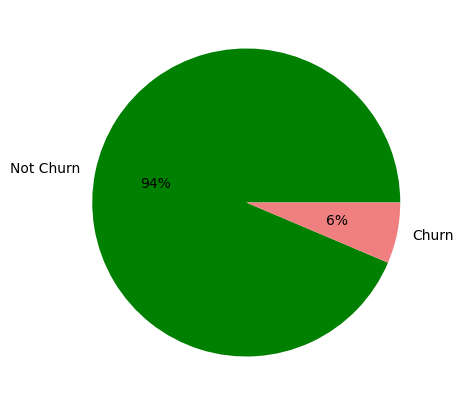

In [424]:
#To plot pie chart for churn_probability:
plt.figure(figsize= (5,5)) 
data = df.churn_probability.value_counts()
labels = ['Not Churn','Churn']
colors = ['green', 'lightcoral']
plt.pie(data, labels=labels, colors = colors, autopct = '%0.0f%%')

plt.show()

churn_probability
0    18915
1     1291
Name: count, dtype: int64


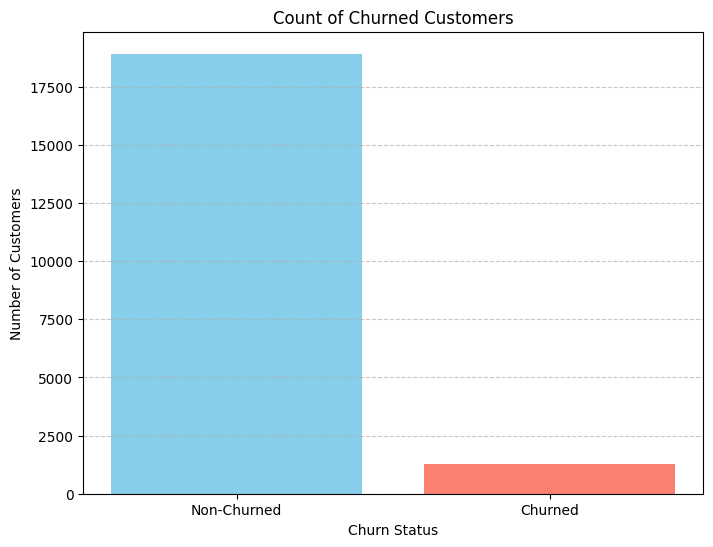

In [425]:
# Counting churned and non-churned customers:
churn_counts = df['churn_probability'].value_counts()
print(churn_counts)

# Plotting:
plt.figure(figsize=(8, 6))
plt.bar(churn_counts.index, churn_counts.values, color=['skyblue', 'salmon'])
plt.title('Count of Churned Customers')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.xticks(churn_counts.index, ['Non-Churned', 'Churned'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [426]:
df.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7
12,0.0,0.0,0.0,439.919,397.946,392.024,244.46,108.31,42.98,571.98,727.91,644.43,0.0,0.0,0.0,0.0,0.0,0.0,0.00,7.86,3.98,44.01,13.93,51.24,0.00,0.00,0.00,0.0,0.0,0.00,44.01,21.79,55.23,244.46,100.44,38.99,527.96,713.98,593.18,0.0,0.0,0.00,0.0,0.0,0.0,772.43,814.43,632.18,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,816.44,836.23,687.41,0.00,0.53,1.06,26.93,25.68,23.46,0.00,0.00,0.00,26.93,26.21,24.53,0.23,0.00,0.00,7.33,8.64,2.46,0.00,0.48,0.0,0.0,0.0,0.0,7.56,9.13,2.46,34.49,35.34,26.99,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,15,10,20,521,418,365,110,110,50,110,0,0,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,322,0.0,0.0,0.0,0,469.5
15,0.0,0.0,0.0,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.0,0.0,0.0,0.0,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.0,0.00,327.46,366.79,385.26,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,6.26,0.0,0.0,0.0,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.03,0.0,0.0,0.0,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,5,3,4,654,400,652,250,250,250,0,150,250,260.42,0.0,354.35,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,602,0.0,0.0,0.0,0,527.0
23,0.0,0.0,0.0,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,0.0,0.0,0.0,0.0,0.0,0.0,859.53,372.71,0.89,79.79,424.63,378.01,11.58,25.43,8.88,0.0,0.0,0.00,950.91,822.78,387.79,0.00,0.00,0.00,202.08,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,202.08,0.00,0.00,0.0,0.0,0.0,0.00,0.05,0.01,0.0,0.0,0.0,1152.99,822.83,387.81,233.28,117.63,30.39,123.78,278.49,148.83,34.31,52.08,23.66,391.38,448.21,202.89,0.00,0.00,0.00,207.03,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,207.03,0.00,0.00,598.54,448.36,203.29,0.13,0.0,0.0,0.00,0.00,0.00,0.0,0.15,0.4,26,19,10,1420,990,494,110,110,144,110,50,30,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,455,0.0,0.0,0.0,0,1205.0
24,0.0,0.0,0.0,371.974,352.069,240.449,93.18,38.29,29.86,531.19,507.76,222.03,0.0,

- To remove all attributes associated with the churn phase:

In [427]:
# To list the columns for the churn month (aug - 8):
col_8 = [col for col in df.columns.to_list() if '_8' in col]
print(col_8)

['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_t2c_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8']


In [428]:
# To delete the churn month columns:
df = df.drop(col_8, axis=1)

In [429]:
# To drop the 'aug_vbc_3g' column:
df = df.drop('aug_vbc_3g', axis=1)

### Checking the churn rate:

In [430]:
# To calculate the percentage of churn_probability_probabilityn_probabilityn_probabilityn_probabilityned customers in the DataFrame:
churn_percentage = round(100 * df['churn_probability'].mean(), 2)
churn_percentage

6.39

#### Observations: The churn rate is very low. We'll address the class imbalance issue later on.

### Outliers Treatment:

- In the filtered dataset, all columns except for "churn" is numeric types. Therefore, We will convert the data type of "churn" to object.

In [431]:
# To convert 'churn' columns to object type:
df['churn_probability'] = df['churn_probability'].astype(object)

In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20206 entries, 12 to 69996
Data columns (total 92 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loc_og_t2o_mou      20206 non-null  float64
 1   std_og_t2o_mou      20206 non-null  float64
 2   loc_ic_t2o_mou      20206 non-null  float64
 3   arpu_6              20206 non-null  float64
 4   arpu_7              20206 non-null  float64
 5   onnet_mou_6         20206 non-null  float64
 6   onnet_mou_7         20206 non-null  float64
 7   offnet_mou_6        20206 non-null  float64
 8   offnet_mou_7        20206 non-null  float64
 9   roam_ic_mou_6       20206 non-null  float64
 10  roam_ic_mou_7       20206 non-null  float64
 11  roam_og_mou_6       20206 non-null  float64
 12  roam_og_mou_7       20206 non-null  float64
 13  loc_og_t2t_mou_6    20206 non-null  float64
 14  loc_og_t2t_mou_7    20206 non-null  float64
 15  loc_og_t2m_mou_6    20206 non-null  float64
 16  loc_og_t

In [433]:
# To identify and list the names of numeric columns:
numeric_cols = df.select_dtypes(exclude=['object']).columns
print(numeric_cols)

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_6', 'roam_og_mou_7',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_mou_6', 'loc_og_mou_7',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_mou_6', 'std_og_mou_7',
       'isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6', 'spl_og_mou_7',
       'og_others_6', 'og_others_7', 'total_og_mou_6', 'total_og_mou_7',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7',
       'loc_ic_mou_6', 'loc_ic_mou_7', 'std_ic_t2t_mou_6', 'std_ic_t2t_

In [434]:
# To removing outliers below the 10th and above the 90th percentile:
for col in numeric_cols: 
    q1 = df[col].quantile(0.10)
    q3 = df[col].quantile(0.90)
    iqr = q3 - q1
    range_low = q1 - 1.5 * iqr
    range_high = q3 + 1.5 * iqr
    # Filtering the dataset and assigning it to 'data':
    data = df.loc[(df[col] > range_low) & (df[col] < range_high)]

data.shape

(20004, 92)

### Creating New Features:

In [435]:
# Listing the columns related to total MOU, recharge number, and recharge amount:
[total for total in data.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_amt_6',
 'total_rech_amt_7']

#### Deriving new column decrease_mou_action:
 This column indicates whether the customer's usage minutes have decreased during the action phase compared to the good phase.

In [436]:
# To calculate total MOU during the good phase (incoming and outgoing):
data['total_mou_good'] = data['total_og_mou_6'] + data['total_ic_mou_6']

In [437]:
# To calculate average MOU during the action phase:
data['total_mou_action'] = (data['total_og_mou_7'] + data['total_ic_mou_7'])

In [438]:
# To calculate the difference between total MOU during the action phase and total MOU during the good phase:
data['diff_mou'] = data['total_mou_action'] - data['total_mou_good']

In [439]:
# To check whether MOU has decreased during the action phase:
data['decrease_mou_action'] = np.where(data['diff_mou'] < 0, 1, 0)

In [440]:
data.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7,total_mou_good,total_mou_action,diff_mou,decrease_mou_action
12,0.0,0.0,0.0,439.919,397.946,244.46,108.31,571.98,727.91,0.0,0.0,0.0,0.0,0.00,7.86,44.01,13.93,0.00,0.00,0.0,0.0,44.01,21.79,244.46,100.44,527.96,713.98,0.0,0.0,0.0,0.0,772.43,814.43,0.0,0.0,0.00,0.00,0.0,0.0,816.44,836.23,0.00,0.53,26.93,25.68,0.00,0.00,26.93,26.21,0.23,0.00,7.33,8.64,0.00,0.48,0.0,0.0,7.56,9.13,34.49,35.34,0.00,0.0,0.00,0.00,0.0,0.00,15,10,521,418,110,110,110,0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,322,0.0,0.0,0,469.5,850.93,871.57,20.64,0
15,0.0,0.0,0.0,580.549,377.294,10.43,24.99,317.11,341.79,0.0,0.0,0.0,0.0,10.43,24.99,313.76,330.88,3.26,10.91,0.0,0.0,327.46,366.79,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.08,0.00,0.1,0.0,327.64,366.79,13.86,20.18,219.31,754.24,0.00,1.93,233.18,776.36,0.00,0.00,0.00,0.00,0.00,1.03,0.0,0.0,0.00,1.03,233.18,777.39,0.00,0.0,0.00,0.00,0.0,0.00,5,3,654,400,250,250,0,150,260.42,0.0,0.0,0.0,1,0,0,0,0,0,0,0,602,0.0,0.0,0,527.0,560.82,1144.18,583.36,0
23,0.0,0.0,0.0,1130.948,905.506,859.53,372.71,293.46,450.11,0.0,0.0,0.0,0.0,859.53,372.71,79.79,424.63,11.58,25.43,0.0,0.0,950.91,822.78,0.00,0.00,202.08,0.00,0.0,0.0,0.0,0.0,202.08,0.00,0.0,0.0,0.00,0.05,0.0,0.0,1152.99,822.83,233.28,117.63,123.78,278.49,34.31,52.08,391.38,448.21,0.00,0.00,207.03,0.00,0.00,0.00,0.0,0.0,207.03,0.00,598.54,448.36,0.13,0.0,0.00,0.00,0.0,0.15,26,19,1420,990,110,110,110,50,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,455,0.0,0.0,0,1205.0,1751.53,1271.19,-480.34,1
24,0.0,0.0,0.0,371.974,352.069,93.18,38.29,531.19,507.76,0.0,0.0,0.0,0.0,93.18,38.29,159.29,219.44,0.00,0.00,0.0,0.0,252.48,257.74,0.00,0.00,371.89,288.31,0.0,0.0,0.0,0.0,371.89,288.31,0.0,0.0,0.00,0.00,0.0,0.0,624.38,546.06,52.49,37.84,170.61,106.71,0.00,1.53,223.11,146.09,0.00,0.00,6.96,9.54,0.00,0.00,0.0,0.0,6.96,9.54,230.08,155.64,0.00,0.0,0.00,0.00,0.0,0.00,7,7,440,427,110,110,110,0,0.04,0.0,0.0,0.0,0,0,1,2,0,0,0,0,1219,0.0,0.0,0,433.5,854.46,701.70,-152.76,1
25,0.0,0.0,0.0,362.951,321.763,193.71,124.53,423.21,184.88,0.0,0.0,0.0,0.0,49.81,75.01,164.39,115.48,3.31,0.00,0.0,0.0,217.53,190.49,143.89,49.51,255.49,64.99,0.0,0.0,0.0,0.0,399.39,114.51,0.0,0.0,0.00,4.40,0.0,0.0,616.93,309.41,113.76,114.98,230.24,180.11,26.71,2.01,370.73,297.11,0.00,2.18,25.88,17.49,0.76,0.00,0.0,0.0,26.64,19.68,401.39,319.08,0.00,0.0,4.01,2.28,0.0,0.00,8,5,330,480,110,150,110,150,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,2831,0.0,0.0,0,405.0,1018.32,628.49,-389.83,1


#### Deriving new column decrease_rech_num_action: 
This column indicates whether the customer's recharge frequency has decreased during the action phase compared to the good phase.

In [441]:
# To calculate recharge number during the action phase:
data['rech_num_action'] = (data['total_rech_num_7'])

In [442]:
# To calculate the difference between recharge number during the action phase and total recharge number during the good phase:
data['diff_rech_num'] = data['rech_num_action'] - data['total_rech_num_6']

In [443]:
# To check whether recharge number has decreased during the action phase:
data['decrease_rech_num_action'] = np.where(data['diff_rech_num'] < 0, 1, 0)

In [444]:
data.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7,total_mou_good,total_mou_action,diff_mou,decrease_mou_action,rech_num_action,diff_rech_num,decrease_rech_num_action
12,0.0,0.0,0.0,439.919,397.946,244.46,108.31,571.98,727.91,0.0,0.0,0.0,0.0,0.00,7.86,44.01,13.93,0.00,0.00,0.0,0.0,44.01,21.79,244.46,100.44,527.96,713.98,0.0,0.0,0.0,0.0,772.43,814.43,0.0,0.0,0.00,0.00,0.0,0.0,816.44,836.23,0.00,0.53,26.93,25.68,0.00,0.00,26.93,26.21,0.23,0.00,7.33,8.64,0.00,0.48,0.0,0.0,7.56,9.13,34.49,35.34,0.00,0.0,0.00,0.00,0.0,0.00,15,10,521,418,110,110,110,0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,322,0.0,0.0,0,469.5,850.93,871.57,20.64,0,10,-5,1
15,0.0,0.0,0.0,580.549,377.294,10.43,24.99,317.11,341.79,0.0,0.0,0.0,0.0,10.43,24.99,313.76,330.88,3.26,10.91,0.0,0.0,327.46,366.79,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.08,0.00,0.1,0.0,327.64,366.79,13.86,20.18,219.31,754.24,0.00,1.93,233.18,776.36,0.00,0.00,0.00,0.00,0.00,1.03,0.0,0.0,0.00,1.03,233.18,777.39,0.00,0.0,0.00,0.00,0.0,0.00,5,3,654,400,250,250,0,150,260.42,0.0,0.0,0.0,1,0,0,0,0,0,0,0,602,0.0,0.0,0,527.0,560.82,1144.18,583.36,0,3,-2,1
23,0.0,0.0,0.0,1130.948,905.506,859.53,372.71,293.46,450.11,0.0,0.0,0.0,0.0,859.53,372.71,79.79,424.63,11.58,25.43,0.0,0.0,950.91,822.78,0.00,0.00,202.08,0.00,0.0,0.0,0.0,0.0,202.08,0.00,0.0,0.0,0.00,0.05,0.0,0.0,1152.99,822.83,233.28,117.63,123.78,278.49,34.31,52.08,391.38,448.21,0.00,0.00,207.03,0.00,0.00,0.00,0.0,0.0,207.03,0.00,598.54,448.36,0.13,0.0,0.00,0.00,0.0,0.15,26,19,1420,990,110,110,110,50,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,455,0.0,0.0,0,1205.0,1751.53,1271.19,-480.34,1,19,-7,1
24,0.0,0.0,0.0,371.974,352.069,93.18,38.29,531.19,507.76,0.0,0.0,0.0,0.0,93.18,38.29,159.29,219.44,0.00,0.00,0.0,0.0,252.48,257.74,0.00,0.00,371.89,288.31,0.0,0.0,0.0,0.0,371.89,288.31,0.0,0.0,0.00,0.00,0.0,0.0,624.38,546.06,52.49,37.84,170.61,106.71,0.00,1.53,223.11,146.09,0.00,0.00,6.96,9.54,0.00,0.00,0.0,0.0,6.96,9.54,230.08,155.64,0.00,0.0,0.00,0.00,0.0,0.00,7,7,440,427,110,110,110,0,0.04,0.0,0.0,0.0,0,0,1,2,0,0,0,0,1219,0.0,0.0,0,433.5,854.46,701.70,-152.76,1,7,0,0
25,0.0,0.0,0.0,362.951,321.763,193.71,124.53,423.21,184.88,0.0,0.0,0.0,0.0,49.81,75.01,164.39,115.48,3.31,0.00,0.0,0.0,217.53,190.49,143.89,49.51,255.49,64.99,0.0,0.0,0.0,0.0,399.39,114.51,0.0,0.0,0.00,4.40,0.0,0.0,616.93,309.41,113.76,114.98,230.24,180.11,26.71,2.01,370.73,297.11,0.00,2.18,25.88,17.49,0.76,0.00,0.0,0.0,26.64,19.68,401.39,319.08,0.00,0.0,4.01,2.28,0.0,0.00,8,5,330,480,110,150,110,150,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,2831,0.0,0.0,0,405.0,1018.32,628.49,-389.83,1,5,-3,1


#### Deriving new column decrease_rech_amt_action: 
This column indicates whether the customer's recharge amount has decreased during the action phase compared to the good phase.

In [445]:
# To calculate average recharge amount during the action phase:
data['rech_amt_action'] = ( data['total_rech_amt_7'])

In [446]:
# To calculate the difference between recharge amount during the action phase and total recharge amount during the good phase:
data['diff_rech_amt'] = data['rech_amt_action'] - data['total_rech_amt_6']

In [447]:
# To check whether recharge amount has decreased during the action phase:
data['decrease_rech_amt_action'] = np.where(data['diff_rech_amt'] < 0, 1, 0)

In [448]:
data.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7,total_mou_good,total_mou_action,diff_mou,decrease_mou_action,rech_num_action,diff_rech_num,decrease_rech_num_action,rech_amt_action,diff_rech_amt,decrease_rech_amt_action
12,0.0,0.0,0.0,439.919,397.946,244.46,108.31,571.98,727.91,0.0,0.0,0.0,0.0,0.00,7.86,44.01,13.93,0.00,0.00,0.0,0.0,44.01,21.79,244.46,100.44,527.96,713.98,0.0,0.0,0.0,0.0,772.43,814.43,0.0,0.0,0.00,0.00,0.0,0.0,816.44,836.23,0.00,0.53,26.93,25.68,0.00,0.00,26.93,26.21,0.23,0.00,7.33,8.64,0.00,0.48,0.0,0.0,7.56,9.13,34.49,35.34,0.00,0.0,0.00,0.00,0.0,0.00,15,10,521,418,110,110,110,0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,322,0.0,0.0,0,469.5,850.93,871.57,20.64,0,10,-5,1,418,-103,1
15,0.0,0.0,0.0,580.549,377.294,10.43,24.99,317.11,341.79,0.0,0.0,0.0,0.0,10.43,24.99,313.76,330.88,3.26,10.91,0.0,0.0,327.46,366.79,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.08,0.00,0.1,0.0,327.64,366.79,13.86,20.18,219.31,754.24,0.00,1.93,233.18,776.36,0.00,0.00,0.00,0.00,0.00,1.03,0.0,0.0,0.00,1.03,233.18,777.39,0.00,0.0,0.00,0.00,0.0,0.00,5,3,654,400,250,250,0,150,260.42,0.0,0.0,0.0,1,0,0,0,0,0,0,0,602,0.0,0.0,0,527.0,560.82,1144.18,583.36,0,3,-2,1,400,-254,1
23,0.0,0.0,0.0,1130.948,905.506,859.53,372.71,293.46,450.11,0.0,0.0,0.0,0.0,859.53,372.71,79.79,424.63,11.58,25.43,0.0,0.0,950.91,822.78,0.00,0.00,202.08,0.00,0.0,0.0,0.0,0.0,202.08,0.00,0.0,0.0,0.00,0.05,0.0,0.0,1152.99,822.83,233.28,117.63,123.78,278.49,34.31,52.08,391.38,448.21,0.00,0.00,207.03,0.00,0.00,0.00,0.0,0.0,207.03,0.00,598.54,448.36,0.13,0.0,0.00,0.00,0.0,0.15,26,19,1420,990,110,110,110,50,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,455,0.0,0.0,0,1205.0,1751.53,1271.19,-480.34,1,19,-7,1,990,-430,1
24,0.0,0.0,0.0,371.974,352.069,93.18,38.29,531.19,507.76,0.0,0.0,0.0,0.0,93.18,38.29,159.29,219.44,0.00,0.00,0.0,0.0,252.48,257.74,0.00,0.00,371.89,288.31,0.0,0.0,0.0,0.0,371.89,288.31,0.0,0.0,0.00,0.00,0.0,0.0,624.38,546.06,52.49,37.84,170.61,106.71,0.00,1.53,223.11,146.09,0.00,0.00,6.96,9.54,0.00,0.00,0.0,0.0,6.96,9.54,230.08,155.64,0.00,0.0,0.00,0.00,0.0,0.00,7,7,440,427,110,110,110,0,0.04,0.0,0.0,0.0,0,0,1,2,0,0,0,0,1219,0.0,0.0,0,433.5,854.46,701.70,-152.76,1,7,0,0,427,-13,1
25,0.0,0.0,0.0,362.951,321.763,193.71,124.53,423.21,184.88,0.0,0.0,0.0,0.0,49.81,75.01,164.39,115.48,3.31,0.00,0.0,0.0,217.53,190.49,143.89,49.51,255.49,64.99,0.0,0.0,0.0,0.0,399.39,114.51,0.0,0.0,0.00,4.40,0.0,0.0,616.93,309.41,113.76,114.98,230.24,180.11,26.71,2.01,370.73,297.11,0.00,2.18,25.88,17.49,0.76,0.00,0.0,0.0,26.64,19.68,401.39,319.08,0.00,0.0,4.01,2.28,0.0,0.00,8,5,330,480,110,150,110,150,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,2831,0.0,0.0,0,405.0,1018.32,628.49,-389.83,1,5,-3,1,480,150,0


#### Deriving new column decrease_arpu_action: 
This column indicates whether the average revenue per customer has decreased during the action phase compared to the good phase.

In [449]:
# To calculate average revenue per user (ARPU) during the action phase:
data['avg_arpu_action'] = (data['arpu_7'])

In [450]:
# To calculate the difference between average ARPU during the action phase and ARPU during the good phase:
data['diff_arpu'] = data['avg_arpu_action'] - data['arpu_6']

In [451]:
# To check whether ARPU has decreased during the action phase:
data['decrease_arpu_action'] = np.where(data['diff_arpu'] < 0, 1, 0)

In [452]:
data.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7,total_mou_good,total_mou_action,diff_mou,decrease_mou_action,rech_num_action,diff_rech_num,decrease_rech_num_action,rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action
12,0.0,0.0,0.0,439.919,397.946,244.46,108.31,571.98,727.91,0.0,0.0,0.0,0.0,0.00,7.86,44.01,13.93,0.00,0.00,0.0,0.0,44.01,21.79,244.46,100.44,527.96,713.98,0.0,0.0,0.0,0.0,772.43,814.43,0.0,0.0,0.00,0.00,0.0,0.0,816.44,836.23,0.00,0.53,26.93,25.68,0.00,0.00,26.93,26.21,0.23,0.00,7.33,8.64,0.00,0.48,0.0,0.0,7.56,9.13,34.49,35.34,0.00,0.0,0.00,0.00,0.0,0.00,15,10,521,418,110,110,110,0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,322,0.0,0.0,0,469.5,850.93,871.57,20.64,0,10,-5,1,418,-103,1,397.946,-41.973,1
15,0.0,0.0,0.0,580.549,377.294,10.43,24.99,317.11,341.79,0.0,0.0,0.0,0.0,10.43,24.99,313.76,330.88,3.26,10.91,0.0,0.0,327.46,366.79,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.08,0.00,0.1,0.0,327.64,366.79,13.86,20.18,219.31,754.24,0.00,1.93,233.18,776.36,0.00,0.00,0.00,0.00,0.00,1.03,0.0,0.0,0.00,1.03,233.18,777.39,0.00,0.0,0.00,0.00,0.0,0.00,5,3,654,400,250,250,0,150,260.42,0.0,0.0,0.0,1,0,0,0,0,0,0,0,602,0.0,0.0,0,527.0,560.82,1144.18,583.36,0,3,-2,1,400,-254,1,377.294,-203.255,1
23,0.0,0.0,0.0,1130.948,905.506,859.53,372.71,293.46,450.11,0.0,0.0,0.0,0.0,859.53,372.71,79.79,424.63,11.58,25.43,0.0,0.0,950.91,822.78,0.00,0.00,202.08,0.00,0.0,0.0,0.0,0.0,202.08,0.00,0.0,0.0,0.00,0.05,0.0,0.0,1152.99,822.83,233.28,117.63,123.78,278.49,34.31,52.08,391.38,448.21,0.00,0.00,207.03,0.00,0.00,0.00,0.0,0.0,207.03,0.00,598.54,448.36,0.13,0.0,0.00,0.00,0.0,0.15,26,19,1420,990,110,110,110,50,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,455,0.0,0.0,0,1205.0,1751.53,1271.19,-480.34,1,19,-7,1,990,-430,1,905.506,-225.442,1
24,0.0,0.0,0.0,371.974,352.069,93.18,38.29,531.19,507.76,0.0,0.0,0.0,0.0,93.18,38.29,159.29,219.44,0.00,0.00,0.0,0.0,252.48,257.74,0.00,0.00,371.89,288.31,0.0,0.0,0.0,0.0,371.89,288.31,0.0,0.0,0.00,0.00,0.0,0.0,624.38,546.06,52.49,37.84,170.61,106.71,0.00,1.53,223.11,146.09,0.00,0.00,6.96,9.54,0.00,0.00,0.0,0.0,6.96,9.54,230.08,155.64,0.00,0.0,0.00,0.00,0.0,0.00,7,7,440,427,110,110,110,0,0.04,0.0,0.0,0.0,0,0,1,2,0,0,0,0,1219,0.0,0.0,0,433.5,854.46,701.70,-152.76,1,7,0,0,427,-13,1,352.069,-19.905,1
25,0.0,0.0,0.0,362.951,321.763,193.71,124.53,423.21,184.88,0.0,0.0,0.0,0.0,49.81,75.01,164.39,115.48,3.31,0.00,0.0,0.0,217.53,190.49,143.89,49.51,255.49,64.99,0.0,0.0,0.0,0.0,399.39,114.51,0.0,0.0,0.00,4.40,0.0,0.0,616.93,309.41,113.76,114.98,230.24,180.11,26.71,2.01,370.73,297.11,0.00,2.18,25.88,17.49,0.76,0.00,0.0,0.0,26.64,19.68,401.39,319.08,0.00,0.0,4.01,2.28,0.0,0.00,8,5,330,480,110,150,110,150,0.00,0.0,0.0,0.0,

#### Deriving new column decrease_vbc_action: 
This column indicates whether the volume-based cost of the customer has decreased during the action phase compared to the good phase.

In [453]:
# To calculate VBC usage for 3G during the action phase:
data['vbc_3g_action'] = (data['jul_vbc_3g'])

In [454]:
# To calculate the difference between VBC during the action phase and VBC during the good phase:
data['diff_vbc'] = data['vbc_3g_action'] - data['jun_vbc_3g']

In [455]:
# To check whether VBC has decreased during the action phase:
data['decrease_vbc_action'] = np.where(data['diff_vbc'] < 0, 1, 0)

In [456]:
data.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7,total_mou_good,total_mou_action,diff_mou,decrease_mou_action,rech_num_action,diff_rech_num,decrease_rech_num_action,rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action,vbc_3g_action,diff_vbc,decrease_vbc_action
12,0.0,0.0,0.0,439.919,397.946,244.46,108.31,571.98,727.91,0.0,0.0,0.0,0.0,0.00,7.86,44.01,13.93,0.00,0.00,0.0,0.0,44.01,21.79,244.46,100.44,527.96,713.98,0.0,0.0,0.0,0.0,772.43,814.43,0.0,0.0,0.00,0.00,0.0,0.0,816.44,836.23,0.00,0.53,26.93,25.68,0.00,0.00,26.93,26.21,0.23,0.00,7.33,8.64,0.00,0.48,0.0,0.0,7.56,9.13,34.49,35.34,0.00,0.0,0.00,0.00,0.0,0.00,15,10,521,418,110,110,110,0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,322,0.0,0.0,0,469.5,850.93,871.57,20.64,0,10,-5,1,418,-103,1,397.946,-41.973,1,0.0,0.0,0
15,0.0,0.0,0.0,580.549,377.294,10.43,24.99,317.11,341.79,0.0,0.0,0.0,0.0,10.43,24.99,313.76,330.88,3.26,10.91,0.0,0.0,327.46,366.79,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.08,0.00,0.1,0.0,327.64,366.79,13.86,20.18,219.31,754.24,0.00,1.93,233.18,776.36,0.00,0.00,0.00,0.00,0.00,1.03,0.0,0.0,0.00,1.03,233.18,777.39,0.00,0.0,0.00,0.00,0.0,0.00,5,3,654,400,250,250,0,150,260.42,0.0,0.0,0.0,1,0,0,0,0,0,0,0,602,0.0,0.0,0,527.0,560.82,1144.18,583.36,0,3,-2,1,400,-254,1,377.294,-203.255,1,0.0,0.0,0
23,0.0,0.0,0.0,1130.948,905.506,859.53,372.71,293.46,450.11,0.0,0.0,0.0,0.0,859.53,372.71,79.79,424.63,11.58,25.43,0.0,0.0,950.91,822.78,0.00,0.00,202.08,0.00,0.0,0.0,0.0,0.0,202.08,0.00,0.0,0.0,0.00,0.05,0.0,0.0,1152.99,822.83,233.28,117.63,123.78,278.49,34.31,52.08,391.38,448.21,0.00,0.00,207.03,0.00,0.00,0.00,0.0,0.0,207.03,0.00,598.54,448.36,0.13,0.0,0.00,0.00,0.0,0.15,26,19,1420,990,110,110,110,50,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,455,0.0,0.0,0,1205.0,1751.53,1271.19,-480.34,1,19,-7,1,990,-430,1,905.506,-225.442,1,0.0,0.0,0
24,0.0,0.0,0.0,371.974,352.069,93.18,38.29,531.19,507.76,0.0,0.0,0.0,0.0,93.18,38.29,159.29,219.44,0.00,0.00,0.0,0.0,252.48,257.74,0.00,0.00,371.89,288.31,0.0,0.0,0.0,0.0,371.89,288.31,0.0,0.0,0.00,0.00,0.0,0.0,624.38,546.06,52.49,37.84,170.61,106.71,0.00,1.53,223.11,146.09,0.00,0.00,6.96,9.54,0.00,0.00,0.0,0.0,6.96,9.54,230.08,155.64,0.00,0.0,0.00,0.00,0.0,0.00,7,7,440,427,110,110,110,0,0.04,0.0,0.0,0.0,0,0,1,2,0,0,0,0,1219,0.0,0.0,0,433.5,854.46,701.70,-152.76,1,7,0,0,427,-13,1,352.069,-19.905,1,0.0,0.0,0
25,0.0,0.0,0.0,362.951,321.763,193.71,124.53,423.21,184.88,0.0,0.0,0.0,0.0,49.81,75.01,164.39,115.48,3.31,0.00,0.0,0.0,217.53,190.49,143.89,49.51,255.49,64.99,0.0,0.0,0.0,0.0,399.39,114.51,0.0,0.0,0.00,4.40,0.0,0.0,616.93,309.41,113.76,114.98,230.24,180.11,26.71,2.01,370.73,297.11,0.00,2.18,25.88,17.49,0.76,0.00,0.0,0.0,26.64,19.68,401.

### Exploratory Data Analysis (EDA):

#### Univariate analysis:

##### Churn Rate based on MOU Decrease in Action Phase:

In [457]:
# To convert 'churn' column to integer type for aggregation purposes:
data['churn_probability'] = data['churn_probability'].astype(int)

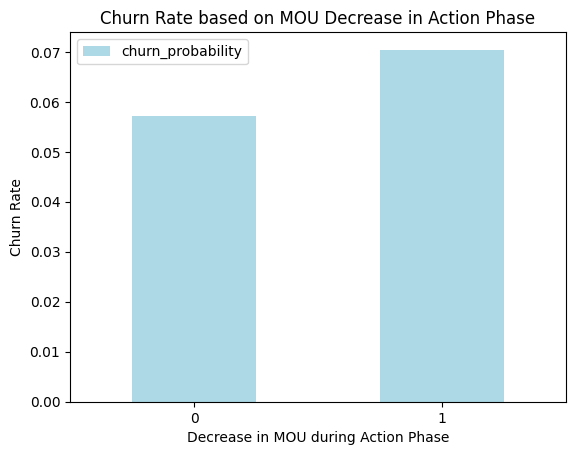

In [458]:
# To create a pivot table and plot the churn rate based on whether the MOU has decreased in the action phase:
pivot_table = data.pivot_table(values='churn_probability', index='decrease_mou_action', aggfunc='mean')

pivot_table.plot(kind='bar', color='lightblue')

plt.ylabel('Churn Rate')
plt.xlabel('Decrease in MOU during Action Phase')
plt.title('Churn Rate based on MOU Decrease in Action Phase')
plt.xticks(rotation=0)  # To rotate x-axis labels to be horizontal
plt.show()

#### Observations: We observe a higher churn rate among customers whose minutes of usage (MOU) decreased during the action phase compared to those in the good phase. 

##### Churn Rate based on Recharge Number Decrease in Action Phase:

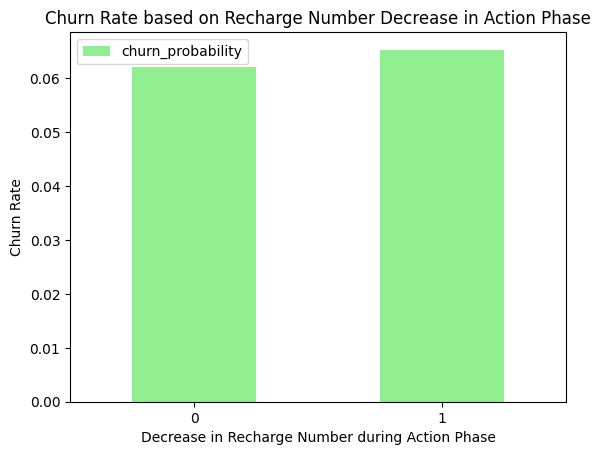

In [459]:
# To create a pivot table and plot the churn rate based on whether the recharge number has decreased in the action phase:
pivot_table = data.pivot_table(values='churn_probability', index='decrease_rech_num_action', aggfunc='mean')

pivot_table.plot(kind='bar', color='lightgreen')

plt.ylabel('Churn Rate')
plt.xlabel('Decrease in Recharge Number during Action Phase')
plt.title('Churn Rate based on Recharge Number Decrease in Action Phase')
plt.xticks(rotation=0)  # To rotate x-axis labels to be horizontal
plt.show()

#### Observations: The churn rate is higher for customers whose number of recharges during the action phase is lower than the number during the good phase.

##### Churn Rate based on Recharge Amount Decrease in Action Phase:

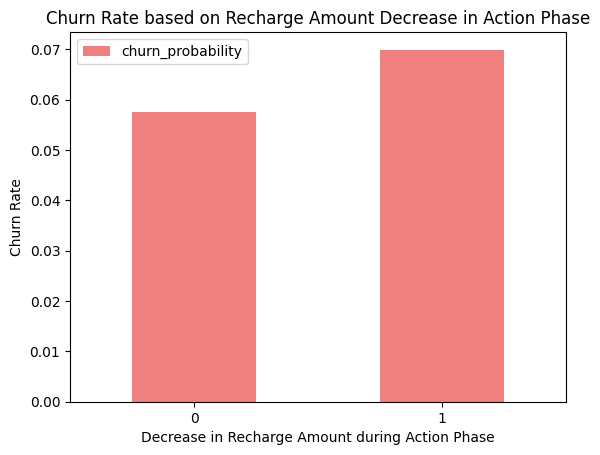

In [460]:
# To create a pivot table and plot the churn rate based on whether the recharge amount has decreased in the action phase:
pivot_table = data.pivot_table(values='churn_probability', index='decrease_rech_amt_action', aggfunc='mean')

# To plot the churn rate bar chart:
pivot_table.plot(kind='bar', color='lightcoral')

plt.ylabel('Churn Rate')
plt.xlabel('Decrease in Recharge Amount during Action Phase')
plt.title('Churn Rate based on Recharge Amount Decrease in Action Phase')
plt.xticks(rotation=0)  # To rotate x-axis labels to be horizontal
plt.show()

#### Observations: The churn rate is higher for customers whose recharge amount during the action phase is lower than the amount during the good phase.

##### Churn Rate based on VBC Decrease in Action Phase:

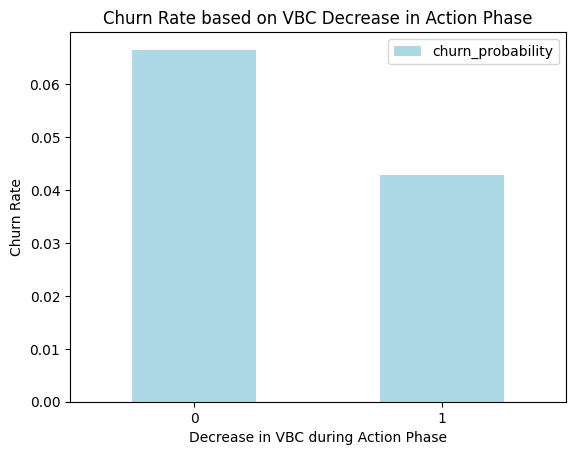

In [461]:
# To create a pivot table and plot the churn rate based on whether the VBC has decreased in the action phase:
pivot_table = data.pivot_table(values='churn_probability', index='decrease_vbc_action', aggfunc='mean')

# To plot the churn rate bar chart:
pivot_table.plot(kind='bar', color='lightblue')

plt.ylabel('Churn Rate')
plt.xlabel('Decrease in VBC during Action Phase')
plt.title('Churn Rate based on VBC Decrease in Action Phase')
plt.xticks(rotation=0)  # To rotate x-axis labels to be horizontal

plt.show()

#### Observations: The churn rate is higher for customers whose volume-based cost in the action month has increased. This suggests that customers are less likely to perform monthly recharges when they are in the action phase.

##### Examination of the average revenue per customer (churn and not churn) in the action phase:

In [462]:
# To create a DataFrame for churned customers:
churn = data[data['churn_probability'] == 1]

# To create a DataFrame for non-churned customers:
non_churn = data[data['churn_probability'] == 0]

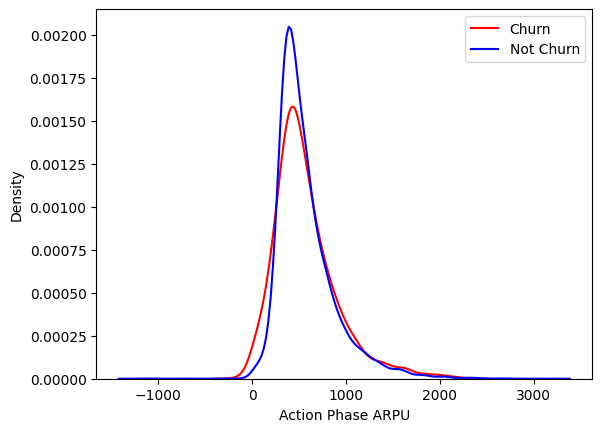

In [463]:
# Distribution plot for churned and non-churned customers based on action phase ARPU:
ax = sns.distplot(churn['avg_arpu_action'], label='Churn', hist=False,color='red')
ax = sns.distplot(non_churn['avg_arpu_action'], label='Not Churn', hist=False, color='blue')

# To set labels for x-axis:
ax.set(xlabel='Action Phase ARPU')

# To show legend:
plt.legend()

# To show plot:
plt.show()

#### Observations: Churned customers tend to have an average revenue per user (ARPU) that is concentrated between 0 and 900. Additionally, customers with higher ARPU are less likely to churn.and the ARPU distribution for customers who haven't churned is primarily concentrated between 0 and 1000.

#### Examination of the minutes of usage MOU (churn and not churn) in the action phase:

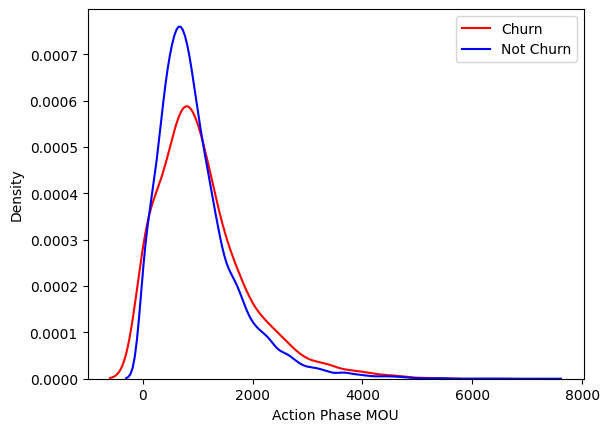

In [464]:
# Distribution plot for churned and non-churned customers based on action phase MOU:
ax = sns.distplot(churn['total_mou_good'], label='Churn', hist=False, color='red')
ax = sns.distplot(non_churn['total_mou_good'], label='Not Churn', hist=False, color='blue')

# To set labels for x-axis:
ax.set(xlabel='Action Phase MOU')

# To show legend:
plt.legend()

# To show plot:
plt.show()

#### Observations: Churned customers tend to have their Minutes of Usage (MOU) concentrated within the range of 0 to 2500. Additionally, there is an inverse relationship between MOU and churn probability, meaning that customers with higher MOU are less likely to churn.

#### Bivariate analysis:

#### Examination of churn rate by the decreasing recharge amount and number of recharge in the action phase:

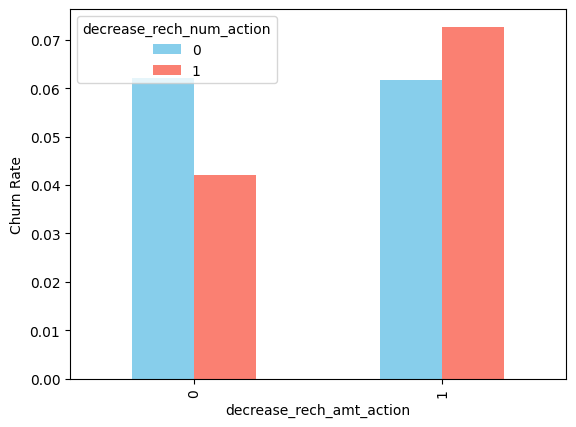

In [465]:
# Creating a pivot table and plotting a bar chart for churn rate based on decrease in recharge amount and recharge number:
pivot_table = data.pivot_table(values='churn_probability', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean')
pivot_table.plot.bar(color=['skyblue', 'salmon'])

# To set y-label:
plt.ylabel('Churn Rate')

# To display the plot:
plt.show()

#### Observations: The data clearly shows that customers who saw a decrease in both recharge amount and the number of recharges during the action phase, in contrast to the good phase, tend to have a higher churn rate.

#### Examination of churn rate by the decreasing recharge amount and volume based cost in the action phase:

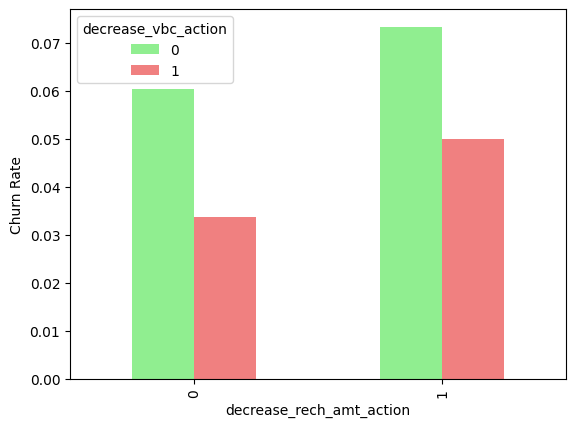

In [466]:
# Creating a pivot table and plotting a bar chart for churn rate based on decrease in recharge amount and VBC:
pivot_table = data.pivot_table(values='churn_probability', index='decrease_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean')
pivot_table.plot.bar(color=['lightgreen', 'lightcoral'])

# To set y-label:
plt.ylabel('Churn Rate')

# To display the plot:
plt.show()

#### Observations: The data indicates that the churn rate is more for the customers, whose recharge amount is decreased along with the volume based cost is increased in the action month.

#### Examination of recharge amount and number of recharge in action month:

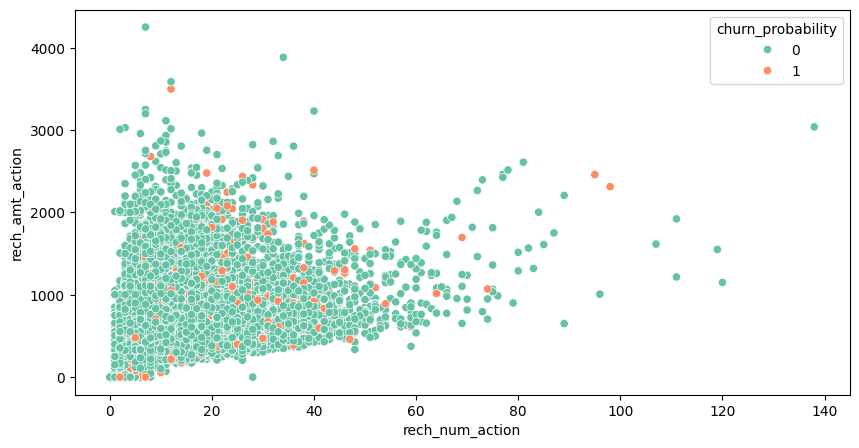

In [467]:
# For Analysis of recharge amount and number of recharge in action month:
# To set figure size:
plt.figure(figsize=(10, 5))

# To create a scatter plot:
ax = sns.scatterplot(x='rech_num_action', y='rech_amt_action', hue='churn_probability', palette='Set2', data=data)

# To display the plot:
plt.show()

#### Observations: The observed pattern indicates that there is a proportional relationship between the number of recharges and the recharge amount. In other words, as the number of recharges increases, the amount of recharge also tends to increase.

- Removing some derived columns that are not necessary for subsequent analysis.

In [468]:
# To drop specified columns from the DataFrame:
data = data.drop(['total_mou_good', 'total_mou_action', 'diff_mou', 'rech_num_action', 'diff_rech_num', 
                  'rech_amt_action', 'diff_rech_amt', 'avg_arpu_action', 'diff_arpu', 'vbc_3g_action', 
                  'diff_vbc','avg_rech_amt_6_7'], axis=1)

### Prepare X_train and y_train:

In [ ]:
import pandas as pd

# Load train.csv and test.csv files
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Assuming your target column is named 'target', adjust accordingly if it has a different name
X_train = train_data.drop(columns=['target'])  # Features
y_train = train_data['target']  # Target variable

# Assuming you already have X_test and y_test from the splitted data
X_test = test_data.drop(columns=['target'])  # Features
y_test = test_data['target']  # Target variable

# Now you have X_train, y_train, X_test, and y_test ready for training and testing your model


In [469]:
# To extract the target variable "churn_probability" from the dataset and storing it in the variable y_train
y_train = data.pop("churn_probability")

# Displaying the first few elements of y_train:
y_train.head()


12    0
15    0
23    0
24    0
25    0
Name: churn_probability, dtype: int32

In [470]:
X_train=data
X_train

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
12,0.0,0.0,0.0,439.919,397.946,244.46,108.31,571.98,727.91,0.0,0.0,0.00,0.0,0.00,7.86,44.01,13.93,0.00,0.00,0.00,0.00,44.01,21.79,244.46,100.44,527.96,713.98,0.00,0.00,0.0,0.0,772.43,814.43,0.00,0.00,0.00,0.00,0.0,0.0,816.44,836.23,0.00,0.53,26.93,25.68,0.00,0.00,26.93,26.21,0.23,0.00,7.33,8.64,0.00,0.48,0.0,0.0,7.56,9.13,34.49,35.34,0.00,0.0,0.00,0.00,0.00,0.00,15,10,521,418,110,110,110,0,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,322,0.0,0.00,0,1,1,1,0
15,0.0,0.0,0.0,580.549,377.294,10.43,24.99,317.11,341.79,0.0,0.0,0.00,0.0,10.43,24.99,313.76,330.88,3.26,10.91,0.00,0.00,327.46,366.79,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.08,0.00,0.1,0.0,327.64,366.79,13.86,20.18,219.31,754.24,0.00,1.93,233.18,776.36,0.00,0.00,0.00,0.00,0.00,1.03,0.0,0.0,0.00,1.03,233.18,777.39,0.00,0.0,0.00,0.00,0.00,0.00,5,3,654,400,250,250,0,150,260.42,0.0,0.00,0.0,1,0,0,0,0,0,0,0,602,0.0,0.00,0,1,1,1,0
23,0.0,0.0,0.0,1130.948,905.506,859.53,372.71,293.46,450.11,0.0,0.0,0.00,0.0,859.53,372.71,79.79,424.63,11.58,25.43,0.00,0.00,950.91,822.78,0.00,0.00,202.08,0.00,0.00,0.00,0.0,0.0,202.08,0.00,0.00,0.00,0.00,0.05,0.0,0.0,1152.99,822.83,233.28,117.63,123.78,278.49,34.31,52.08,391.38,448.21,0.00,0.00,207.03,0.00,0.00,0.00,0.0,0.0,207.03,0.00,598.54,448.36,0.13,0.0,0.00,0.00,0.00,0.15,26,19,1420,990,110,110,110,50,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,455,0.0,0.00,1,1,1,1,0
24,0.0,0.0,0.0,371.974,352.069,93.18,38.29,531.19,507.76,0.0,0.0,0.00,0.0,93.18,38.29,159.29,219.44,0.00,0.00,0.00,0.00,252.48,257.74,0.00,0.00,371.89,288.31,0.00,0.00,0.0,0.0,371.89,288.31,0.00,0.00,0.00,0.00,0.0,0.0,624.38,546.06,52.49,37.84,170.61,106.71,0.00,1.53,223.11,146.09,0.00,0.00,6.96,9.54,0.00,0.00,0.0,0.0,6.96,9.54,230.08,155.64,0.00,0.0,0.00,0.00,0.00,0.00,7,7,440,427,110,110,110,0,0.04,0.0,0.00,0.0,0,0,1,2,0,0,0,0,1219,0.0,0.00,1,0,1,1,0
25,0.0,0.0,0.0,362.951,321.763,193.71,124.53,423.21,184.88,0.0,0.0,0.00,0.0,49.81,75.01,164.39,115.48,3.31,0.00,0.00,0.00,217.53,190.49,143.89,49.51,255.49,64.99,0.00,0.00,0.0,0.0,399.39,114.51,0.00,0.00,0.00,4.40,0.0,0.0,616.93,309.41,113.76,114.98,230.24,180.11,26.71,2.01,370.73,297.11,0.00,2.18,25.88,17.49,0.76,0.00,0.0,0.0,26.64,19.68,401.39,319.08,0.00,0.0,4.01,2.28,0.00,0.00,8,5,330,480,110,150,110,150,0.00,0.0,0.00,0.0,0,0,0,0,0,0,0,0,2831,0.0,0.00,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

### Dealing with data imbalance:

- We will generate synthetic samples through upsampling using SMOTE (Synthetic Minority Oversampling Technique).

In [471]:
# Instantiate SMOTE (Synthetic Minority Over-sampling Technique) with a random state:
sm = SMOTE(random_state=27)

In [472]:
# To fit SMOTE to the training set to balance the class distribution:
X_train, y_train = sm.fit_resample(X_train, y_train)

### Scaling:

In [473]:
# Instantiate the StandardScaler for feature standardization:
scaler = StandardScaler()

In [474]:
# List of numeric columns to be scaled:
cols_scale = X_train.columns.to_list()

# Removing the derived binary columns from the list:
cols_scale.remove('decrease_mou_action')
cols_scale.remove('decrease_rech_num_action')
cols_scale.remove('decrease_rech_amt_action')
cols_scale.remove('decrease_arpu_action')
cols_scale.remove('decrease_vbc_action')

In [475]:
# To fit the data into scaler and transform:
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [476]:
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
0,0.0,0.0,0.0,-0.421175,-0.531534,-0.212835,-0.465298,0.266145,0.604167,-0.233737,-0.223933,-0.275238,-0.310703,-0.363040,-0.321691,-0.485320,-0.637411,-0.307927,-0.311871,-0.209401,-0.230152,-0.556299,-0.622030,-0.031812,-0.323088,0.560325,0.961998,-0.139533,-0.12967,0.0,0.0,0.374116,0.451240,-0.104038,-0.094678,-0.369042,-0.389039,-0.362406,-0.014933,0.085568,0.138481,-0.444589,-0.401271,-0.571309,-0.576344,-0.324157,-0.303307,-0.659997,-0.644913,-0.223852,-0.210199,-0.249478,-0.218299,-0.132645,-0.115711,0.0,0.0,-0.324927,-0.287479,-0.732319,-0.700547,-0.400344,-0.151795,-0.190792,-0.182788,-0.085138,-0.093832,0.247814,-0.254788,-0.420095,-0.644536,-0.279943,-0.314509,0.164730,-0.829564,-0.263444,-0.257194,-0.276996,-0.283219,-0.249218,-0.25844,-0.268553,-0.269446,-0.238204,-0.24464,-0.134164,-0.133362,-0.874203,-0.288679,-0.272612,0,1,1,1,0
1,0.0,0.0,0.0,0.037365,-0.599161,-0.687243,-0.632600,-0.254572,-0.183331,-0.233737,-0.223933,-0.275238,-0.310703,-0.313652,-0.239202,0.858859,0.985908,-0.104119,0.379121,-0.209401,-0.230152,0.324630,0.471814,-0.561443,-0.537947,-0.573596,-0.557488,-0.139533,-0.12967,0.0,0.0,-0.805980,-0.775033,-0.104038,-0.094678,-0.364311,-0.389039,-0.311063,-0.014933,-0.642156,-0.550006,-0.334181,-0.261691,0.506895,3.589653,-0.324157,-0.253684,0.145232,2.216193,-0.227084,-0.210199,-0.327837,-0.300809,-0.132645,-0.079168,0.0,0.0,-0.384347,-0.344911,-0.073180,1.653320,-0.400344,-0.151795,-0.190792,-0.182788,-0.085138,-0.093832,-0.835852,-1.037616,-0.061384,-0.693312,0.708350,0.726676,-0.829174,0.564451,0.843685,-0.257194,-0.276996,-0.283219,3.247680,-0.25844,-0.268553,-0.269446,-0.238204,-0.24464,-0.134164,-0.133362,-0.558573,-0.288679,-0.272612,0,1,1,1,0
2,0.0,0.0,0.0,1.832003,1.130536,1.033988,0.065603,-0.302890,0.037589,-0.233737,-0.223933,-0.275238,-0.310703,3.706995,1.435240,-0.307026,1.466066,0.416029,1.298755,-0.209401,-0.230152,2.262240,1.917559,-0.561443,-0.537947,-0.139581,-0.557488,-0.139533,-0.12967,0.0,0.0,-0.497248,-0.775033,-0.104038,-0.094678,-0.369042,-0.386568,-0.362406,-0.014933,0.586622,0.118829,1.413711,0.430525,-0.028508,0.869255,0.660628,1.035757,0.762868,0.964614,-0.227084,-0.210199,1.885356,-0.300809,-0.132645,-0.147603,0.0,0.0,1.242860,-0.352214,1.138874,0.609600,0.329688,-0.151795,-0.190792,-0.182788,-0.085138,-0.081631,1.439846,0.751706,2.004574,0.905475,-0.279943,-0.314509,0.164730,-0.364893,-0.263444,-0.257194,-0.276996,-0.283219,-0.249218,-0.25844,-0.268553,-0.269446,-0.238204,-0.24464,-0.134164,-0.133362,-0.724279,-0.288679,-0.272612,1,1,1,1,0
3,0.0,0.0,0.0,-0.642718,-0.681764,-0.519499

### Test Dataset Preparation

In [492]:
test_data = pd.read_csv("test.csv")

In [494]:
X_test = test_data.drop(columns=['id']) 
y_test = test_data['id']

In [495]:
test_data.shape

(30000, 171)

In [497]:
#Feature scaling on test dataset
X_test = scaler.transform(X_test[cols_scale])
X_test = pd.DataFrame(X_test)

In [498]:
X_test.shape

(30000, 90)

In [485]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89
0,0.0,0.0,0.0,-1.692551,3.082228,-0.704676,4.897885,-0.862385,0.901793,-0.161066,-0.213280,-0.102258,-0.212747,-0.363040,0.164528,-0.704624,0.336222,-0.307927,-0.311871,-0.209401,-0.230152,-0.693077,0.300826,-0.561443,5.166340,-0.573596,0.854269,-0.139533,-0.12967,0.0,0.0,-0.805980,4.238798,-0.104038,-0.094678,-0.369042,-0.389039,-0.362406,-0.014933,-1.129945,4.254648,-0.444589,-0.327751,-0.722240,-0.561191,-0.324157,-0.303307,-0.765136,-0.595330,-0.227084,-0.210199,-0.327837,-0.277889,-0.132645,-0.080497,0.0,0.0,-0.384347,-0.328036,-0.846737,-0.677168,-0.400344,-0.151795,-0.190792,-0.182788,-0.085138,-0.087325,-1.269318,4.106686,-1.825270,3.103129,-1.056459,-0.240138,-0.829174,-0.364893,-0.263444,-0.257194,-0.276996,-0.283219,-0.249218,-0.258440,-0.268553,-0.269446,-0.238204,-0.24464,-0.134164,-0.133362,-0.388358,-0.288679,-0.272612
1,0.0,0.0,0.0,0.061555,-0.191591,-0.177361,0.620238,-0.244315,-0.770772,-0.217872,-0.212600,-0.015122,-0.018069,-0.313131,-0.359541,-0.628582,-0.614722,-0.307927,-0.311871,-0.209401,0.130213,-0.612863,-0.632905,-0.042579,0.790567,0.044438,-0.495919,-0.139533,-0.12967,0.0,0.0,-0.000448,0.203630,-0.104038,0.056686,-0.321132,-0.167179,-0.362406,-0.014933,-0.305316,-0.098362,-0.412486,-0.405035,-0.605721,-0.702257,-0.324157,-0.303307,-0.668196,-0.730919,-0.207974,-0.111495,-0.125792,-0.299281,-0.132645,-0.147603,0.0,0.0,-0.225108,-0.297902,-0.697154,-0.765194,-0.400344,-0.151795,-0.190792,-0.116647,-0.085138,-0.093832,3.715544,0.975371,0.016831,-0.273292,-0.703498,-0.180642,-0.648464,-0.643696,-0.219698,1.849123,0.920171,-0.283219,-0.249218,-0.258440,7.697467,3.683210,-0.238204,-0.24464,-0.134164,1.018918,-0.939583,-0.288679,1.825512
2,0.0,0.0,0.0,-0.168334,-0.070777,-0.581569,-0.388434,0.017361,0.298810,-0.233737,1.069701,-0.275238,0.931429,-0.099621,0.120515,1.195713,1.445067,2.309067,2.616137,0.109079,0.323183,0.795164,1.104881,-0.546429,-0.535851,-0.522029,-0.536184,-0.091474,1.49117,0.0,0.0,-0.757992,-0.733883,-0.104038,-0.094678,-0.221170,-0.153838,-0.362406,-0.014933,-0.366520,-0.210089,0.557848,0.672748,2.530140,2.406859,5.058437,5.803988,2.723958,2.827585,0.091321,-0.096735,0.387444,0.292039,2.065588,0.598541,0.0,0.0,0.589163,0.228696,2.528941,2.418434,-0.400344,-0.151795,-0.190792,-0.182788,-0.085138,-0.093832,-0.727485,-0.590286,0.240688,0.176536,1.414273,2.957787,0.977924,-0.587935,0.151230,0.028620,0.176824,0.341058,-0.249218,-0.258440,-0.268553,-0.269446,2.120168,1.99953,1.121159,-0.133362,0.266574,1.141785,0.519334
3,0.0,0.0,0.0,-0.062485,-0.330531,1.953552,0.524519,-0.579277,-0.694331,-0.233737,-0.223933,-0.275238,-0.310703,5.855017,2.535820,-0.048555,-0.266191,-0.307927,-0.271969,-0.209401,-0.230152,3.797286,1.491214,-0.561443,-0.537947,-0.563523,-0.557488,-0.139533,-0.12967,0.0,0.0,-0.798814,-0.775033,-0.104038,-0.094678,1.031610,-0.130614,1.378152,-0.014933,1.068426,-0.070790,0.278641,0.144831,0.521916,0.060998,-0.199014,-0.202003,0.473102,0.088528,-0.227084,-0.210199,-0.273745,-0.300809,-0.132645,-0.073853,0.0,0.0,-0.344577,-0.344344,0.222237,-0.115958,-0.400344,-0.151795,-0.190792,-0.182788,-0.085138,-0.093832,2.523511,0.192543,-0.153084,-0.332908,-0.767031,-0.314509,-0.558109,-0.550761,-0.096197,0.765690,0.833039,-0.283219,-0.249218,-0.258440,7.033632,0.295219,-0.238204,-0.24464,3.631804,2.171198,0.059160,-0.288679,0.594829
4,0.0,0.0,0.0,0.507232,0.383699,-0.482605,-0.541861,-0.214936,-0.077786,-0.233737,-0.223933,-0.275238,-0.310703,0.164365,-0.021590,0.933854,1.240968,0.172835,0.317686,-0.209401,-0.083681,0.698913,0.769911,-0.561443,-0.537947,-0.573596,-0.553976,-0.139533,-0.12967,0.0,0.0,-0.805980,-0.772549,-0.104038,-0.094678,-0.369042,-0.169155,0.151033,-0.014933,-0.461639,-0.403168,0.183607,0.164933,0.305131,0.205895,

### Scaling the test set:

In [ ]:
# We won't fit scaler on the test set. We only transform the test set.
# To transform the test set:
X_test[cols_scale] = scaler.transform(X_test[cols_scale])

# To display the head of the transformed test set
print(X_test.head())

       loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
58165             0.0             0.0             0.0 -1.694442  3.075612   
603               0.0             0.0             0.0  0.053129 -0.191793   
28696             0.0             0.0             0.0 -0.175904 -0.071216   
34825             0.0             0.0             0.0 -0.070449 -0.330460   
17757             0.0             0.0             0.0  0.497146  0.382370   

       onnet_mou_6  onnet_mou_7  offnet_mou_6  offnet_mou_7  roam_ic_mou_6  \
58165    -0.720128     4.896561     -0.876017      0.930813      -0.166245   
603      -0.187750     0.616776     -0.245935     -0.782797      -0.222269   
28696    -0.595839    -0.392400      0.020828      0.313033      -0.237915   
34825     1.963621     0.521009     -0.587406     -0.704480      -0.237915   
17757    -0.495925    -0.545903     -0.215984     -0.072805      -0.237915   

       roam_ic_mou_7  roam_og_mou_6  roam_og_mou_7  loc_og_t2t_mou_6

### Model Building with PCA:

In [ ]:
# Instantiate PCA (Principal Component Analysis) with random state:
pca = PCA(random_state=42)

In [ ]:
# To fit the PCA model to the training set:
pca.fit(X_train)

PCA(random_state=42)

In [ ]:
# Accessing the principal components of the fitted PCA model:
pca.components_

array([[-7.93181292e-21, -5.72458747e-17,  4.16333634e-17, ...,
         1.51400915e-03,  3.26630567e-03,  1.94617351e-02],
       [ 1.01387734e-19,  1.52655666e-16, -1.11022302e-16, ...,
        -3.04346415e-03, -7.06103965e-03, -1.10391418e-02],
       [-2.51908548e-20, -8.67361738e-18, -2.08166817e-17, ...,
        -1.51279749e-02, -1.54513161e-02,  3.59100110e-02],
       ...,
       [ 0.00000000e+00,  9.53976265e-03,  2.00241624e-01, ...,
         6.24500451e-17, -6.93889390e-18, -4.16333634e-17],
       [ 9.99998661e-01,  1.59209709e-03, -3.49983564e-04, ...,
        -1.05709712e-18, -1.84314369e-18,  5.75982404e-19],
       [-0.00000000e+00, -1.60752844e-01, -8.29600931e-01, ...,
        -1.38777878e-16, -1.11022302e-16,  2.42861287e-17]])

In [ ]:
# To calculate the cumulative variance explained by the principal components:
variance_cumu = np.cumsum(pca.explained_variance_ratio_)

# To display the cumulative variance:
print(variance_cumu)

[0.10669447 0.19866051 0.25397624 0.30388759 0.34703937 0.38920999
 0.42748163 0.45966887 0.48809175 0.5155854  0.54235036 0.56618289
 0.5893944  0.6110598  0.6314837  0.65088686 0.66873754 0.68651664
 0.70350789 0.72022439 0.73642576 0.75147099 0.76482464 0.77782771
 0.7896203  0.80116728 0.81176391 0.82180926 0.83130518 0.84067115
 0.84995651 0.85905295 0.86760554 0.87522106 0.8824716  0.88941951
 0.89576311 0.90184768 0.90772167 0.91352181 0.91917113 0.92471229
 0.9297253  0.93412156 0.93809309 0.94176692 0.94535905 0.94884285
 0.95226296 0.95559876 0.95885139 0.96200195 0.96506615 0.96801136
 0.9708814  0.97358955 0.97625592 0.97879207 0.98118239 0.98351384
 0.9857809  0.98787862 0.98982197 0.99169188 0.99328093 0.9944842
 0.99566338 0.99674487 0.9976722  0.99847754 0.998997   0.99946808
 0.99989067 0.99997506 0.99999912 0.99999982 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.      

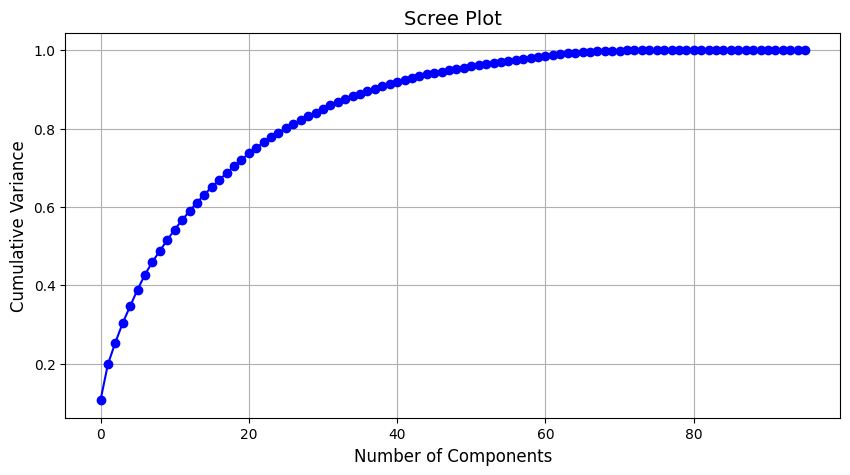

In [ ]:
# Plotting the scree plot to visualize the cumulative variance explained by principal components:
fig = plt.figure(figsize=(10, 5))
plt.plot(variance_cumu, color='blue', marker='o', linestyle='-')
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Variance', fontsize=12)
plt.grid(True)
plt.title('Scree Plot', fontsize=14)
plt.show()

#### Observations: We can see that 60 components account for almost more than 90% of the variance in the data. Therefore, we will proceed with performing PCA using 60 components.

### Principal Component Analysis (PCA):

In [ ]:
# Instantiate PCA (Principal Component Analysis) with 60 components using IncrementalPCA:
pca_final = IncrementalPCA(n_components=60)

In [ ]:
# To fit and transform the training set using the PCA model:
X_train_pca = pca_final.fit_transform(X_train)

### Applying transformation on the test set:
- In the test set, we perform only the transformation step without fitting, as the fitting has already been completed on the training set. Thus, We simply apply the pre-fitted transformation from the training set to the test set.

In [ ]:
# To transform the test set using the fitted PCA model:
X_test_pca = pca_final.transform(X_test)

- Focusing more on Sensitivity/Recall than Accuracy: The primary focus is on maximizing sensitivity/recall rather than accuracy in order to prioritize identifying churn cases over non-churn cases. Retaining customers with a possibility of churning is the main objective, so it's acceptable to classify some non-churn customers as churners and offer them incentives to retain them. Therefore, sensitivity score holds more significance in this context.

### Logistic regression with PCA:

- In logistic regression, C is the inverse of the regularization strength. Higher values of C mean less regularization, while lower values result in more regularization.

#### Tuning hyperparameter  C:

In [ ]:
# To create a KFold object with 5 splits:
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specifying parameters for grid search:
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifying the scoring metric as recall:
model_cv = GridSearchCV(estimator=LogisticRegression(),
                        param_grid=params,
                        scoring='recall',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

# To fit the model:
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [ ]:
# To Display the results of grid search cross-validation:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.126393,0.007194,0.003492,0.001638,0.01,{'C': 0.01},0.772937,0.799249,0.790435,0.778400,0.783161,0.784836,0.009218,6,0.789641,0.789578,0.785970,0.787428,0.788457,0.788215,0.001386
1,0.143279,0.017053,0.009759,0.007976,0.1,{'C': 0.1},0.772937,0.800956,0.789439,0.779058,0.788507,0.786179,0.009596,1,0.787803,0.789413,0.784886,0.787679,0.787790,0.787514,0.001463
2,0.153829,0.006679,0.000268,0.000537,1,{'C': 1},0.772607,0.800273,0.790435,0.777412,0.789843,0.786114,0.009912,2,0.788638,0.789164,0.785470,0.786926,0.788207,0.787681,0.001330
3,0.163101,0.007022,0.002734,0.005469,10,{'C': 10},0.772607,0.799249,0.789771,0.776753,0.789843,0.785645,0.009683,3,0.787970,0.788419,0.785303,0.786258,0.787374,0.787065,0.001140
4,0.163822,0.010376,0.000000,0.000000,100,{'C': 100},0.772607,0.799590,0.789771,0.776424,0.789509,0.785580,0.009812,4,0.787803,0.788419,0.785136,0.786258,0.787374,0.786998,0.001168
5,0.171177,0.011674,0.000399,0.000798,1000,{'C': 1000},0.772607,0.799590,0.789771,0.776095,0.789509,0.785514,0.009874,5,0.787803,0.788336,0.785136,0.786258,0.787374,0.786981,0.001148


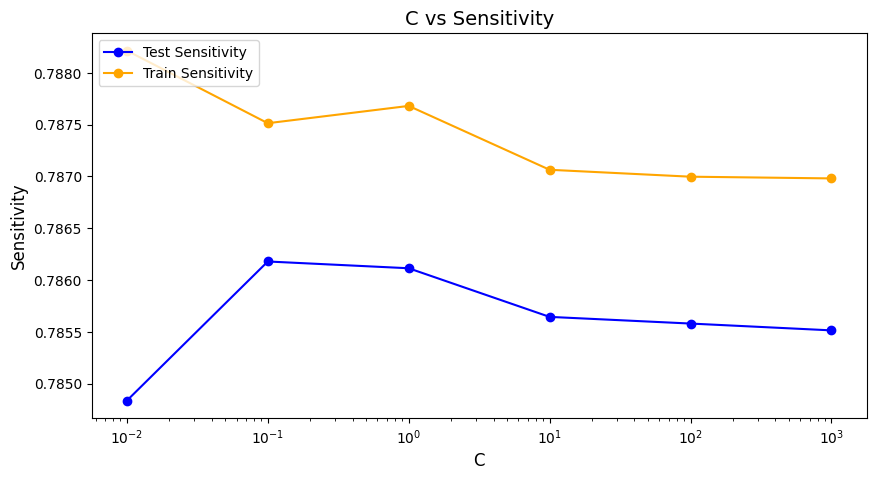

In [ ]:
# To Plot C versus train and validation scores:
plt.figure(figsize=(10, 5))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'], marker='o', color='blue', label='Test Sensitivity')
plt.plot(cv_results['param_C'], cv_results['mean_train_score'], marker='o', color='orange', label='Train Sensitivity')
plt.xlabel('C', fontsize=12)
plt.ylabel('Sensitivity', fontsize=12)
plt.legend(loc='upper left')
plt.xscale('log')
plt.title('C vs Sensitivity', fontsize=14)
plt.show()

In [ ]:
# To print the best score and corresponding value of C:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print("The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

The highest test sensitivity is 0.7861793544941964 at C = 0.1


### Logistic regression with optimal C:

In [ ]:
# Instantiate the logistic regression model with the best value of C:
logistic_pca = LogisticRegression(C=best_C)

In [ ]:
# To fit the logistic regression model on the training set:
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

### Prediction on the train set:

In [ ]:
# To make predictions on the training set:
y_train_pred = log_pca_model.predict(X_train_pca)

In [ ]:
# To make the confusion matrix:
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[10488  4512]
 [ 3190 11810]]


In [ ]:
# To calculate true positives, true negatives, false positives, and false negatives from the confusion matrix:
TP = confusion[1, 1]  # for true positives
TN = confusion[0, 0]  # for true negatives
FP = confusion[0, 1]  # for false positives
FN = confusion[1, 0]  # for false negatives

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

True Positives: 11810
True Negatives: 10488
False Positives: 4512
False Negatives: 3190


In [ ]:
# To print accuracy, sensitivity, and specificity:
print("Accuracy: {:.2f}".format(metrics.accuracy_score(y_train, y_train_pred)))
print("Sensitivity: {:.2f}".format(TP / float(TP + FN)))
print("Specificity: {:.2f}".format(TN / float(TN + FP)))

Accuracy: 0.74
Sensitivity: 0.79
Specificity: 0.70


### Prediction on the test set:

In [ ]:
# To make predictions on the test set:
y_test_pred = log_pca_model.predict(X_test_pca)

In [ ]:
# To make the confusion matrix for the test set:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[3318  549]
 [  24  110]]


In [ ]:
# To calculate true positives, true negatives, false positives, and false negatives from the confusion matrix:
TP = confusion[1, 1]  # for true positives
TN = confusion[0, 0]  # for true negatives
FP = confusion[0, 1]  # for false positives
FN = confusion[1, 0]  # for false negatives

# Printing true positives, true negatives, false positives, and false negatives:
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

True Positives: 110
True Negatives: 3318
False Positives: 549
False Negatives: 24


In [ ]:
# To print accuracy, sensitivity, and specificity:
print("Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_test_pred)))
print("Sensitivity: {:.2f}".format(TP / float(TP + FN)))
print("Specificity: {:.2f}".format(TN / float(TN + FP)))

Accuracy: 0.86
Sensitivity: 0.82
Specificity: 0.86


### Observations:
|                     | Train Set Performance | Test Set Performance |
|---------------------|-----------------------|----------------------|
| Accuracy            | 0.88                  | 0.86                 |
| Sensitivity         | 0.91                  | 0.82                 |
| Specificity         | 0.86                  | 0.86                 |

In the test set, the model demonstrates consistent performance, reflecting its learning from the train set.


### Support Vector Machine(SVM) with PCA:

- C is Regularization parameter and gamma Handles non linear classifications.

#### Hyperparameter tuning:

In [ ]:
# To specify range of hyperparameters:
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# To specify model with RBF kernel:
model = SVC(kernel="rbf")

# To set up GridSearchCV():
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = 3, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True
                        )  # Utilize all available CPU cores      
    
# To fit the model:
model_cv.fit(X_train_pca, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
# To display the cross-validation results:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,40.099281,1.387862,18.712602,0.372501,1,0.01,"{'C': 1, 'gamma': 0.01}",0.939807,0.939034,0.939903,0.939581,0.000389,5,0.945072,0.944396,0.942415,0.943961,0.001127
1,53.152832,1.149740,24.413861,1.142455,1,0.001,"{'C': 1, 'gamma': 0.001}",0.883768,0.888406,0.887826,0.886667,0.002063,10,0.889469,0.888019,0.887488,0.888325,0.000837
2,61.962860,0.570724,34.654556,0.896960,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.855845,0.859614,0.861256,0.858905,0.002265,12,0.859034,0.860386,0.858841,0.859420,0.000688
3,31.951777,0.530074,13.636705,0.145415,10,0.01,"{'C': 10, 'gamma': 0.01}",0.961159,0.961256,0.964928,0.962448,0.001754,3,0.972126,0.970918,0.968792,0.970612,0.001378
4,32.545314,1.466322,20.994055,0.252972,10,0.001,"{'C': 10, 'gamma': 0.001}",0.907536,0.911208,0.910821,0.909855,0.001647,7,0.912995,0.912560,0.912126,0.912560,0.000355
5,40.065720,1.031906,24.643298,0.377550,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.878937,0.880966,0.882319,0.880741,0.001390,11,0.883043,0.879758,0.881014,0.881272,0.001353
6,24.830076,0.878653,7.161046,0.299749,100,0.01,"{'C': 100, 'gamma': 0.01}",0.972077,0.975169,0.975266,0.974171,0.001481,2,0.988744,0.987778,0.987729,0.988084,0.000467
7,29.392755,0.899831,13.760527,0.117756,100,0.001,"{'C': 100, 'gamma': 0.001}",0.935072,0.937391,0.934300,0.935588,0.001314,6,0.941932,0.942995,0.940435,0.941787,0.001050
8,32.586161,0.565825,19.223387,0.454737,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.888406,0.893913,0.892947,0.891755,0.002401,9,0.896135,0.893768,0.891401,0.893768,0.001933
9,33.834855,1.975136,4.407165,0.175797,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.975362,0.978551,0.980097,0.978003,0.001971,1,0.997778,0.997633,0.997633,0.997681,0.000068


### Plotting the accuracy with various C and gamma values:

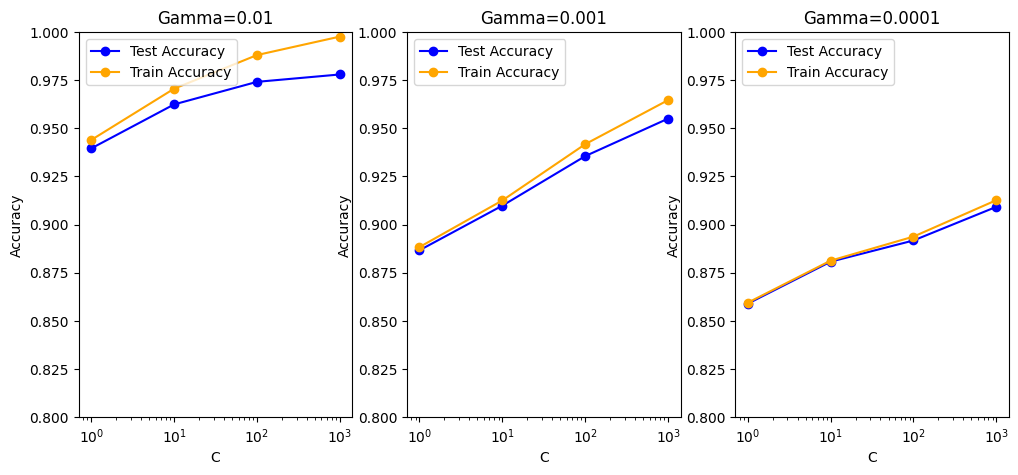

In [ ]:
# Converting 'C' to numeric type for plotting on x-axis:
cv_results['param_C'] = cv_results['param_C'].astype('float')  # To change to float type

# To filter out non-positive values for param_C and param_gamma:
cv_results = cv_results[(cv_results['param_C'] > 0) & (cv_results['param_gamma'] > 0)]

# Plotting the grid search results with different values of gamma
plt.figure(figsize=(12, 5))

# Subplot 1/3 for gamma=0.01:
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma'] == 0.01]
plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"], marker='o', color='blue')
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"], marker='o', color='orange')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['Test Accuracy', 'Train Accuracy'], loc='upper left')
plt.xscale('log')

# Subplot 2/3 for gamma=0.001:
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma'] == 0.001]
plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"], marker='o', color='blue')
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"], marker='o', color='orange')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['Test Accuracy', 'Train Accuracy'], loc='upper left')
plt.xscale('log')

# Subplot 3/3 for gamma=0.0001:
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma'] == 0.0001]
plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"], marker='o', color='blue')
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"], marker='o', color='orange')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['Test Accuracy', 'Train Accuracy'], loc='upper left')
plt.xscale('log')

plt.show()


In [ ]:
# To Print the best test score and corresponding hyperparameters:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {:.2f} corresponding to hyperparameters {}".format(best_score, best_hyperparams))

The best test score is 0.98 corresponding to hyperparameters {'C': 1000, 'gamma': 0.01}


### Observations: 

1. The plot suggests that a higher gamma value results in overfitting the model. Conversely, when gamma is set to its lowest value (0.0001), the accuracy of the model on both the training and test datasets is nearly same.

2. At a C value of 100, we observe high accuracy, and the scores on both the training and test datasets are almost similar.

3. We can reach about 90% accuracy on average tests by using a gamma value of 0.0001, but we need to increase the cost parameter, C. So, to get high accuracy, we have to decide between:

- Using a high gamma for more non-linearity and an average C.
- Using a low gamma for less non-linearity and a higher C.

#### We believe that simplicity in the model is best achieved by minimizing non-linearity. Hence, we select a gamma value of 0.0001 and a high C value of 100.

### Building the model with optimal hyperparameters:

In [ ]:
# To make the model with optimal hyperparameters:
svm_pca_model = SVC(C=100, gamma=0.0001, kernel="rbf")

svm_pca_model.fit(X_train_pca, y_train)

SVC(C=100, gamma=0.0001)

### Prediction on the train set:

In [ ]:
# To make predictions on the training set using the SVM model with PCA:
y_train_predictions = svm_pca_model.predict(X_train_pca)

In [ ]:
# To create the confusion matrix for evaluating model performance on the training set:
confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion_matrix)

[[13304  2221]
 [ 1403 14122]]


In [ ]:
# To calculate true positives, true negatives, false positives, and false negatives from the confusion matrix:
TP = confusion[1, 1]  # for True positives
TN = confusion[0, 0]  # for True negatives
FP = confusion[0, 1]  # for False positives
FN = confusion[1, 0]  # for False negatives

# Printing true positives, true negatives, false positives, and false negatives:
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

True Positives: 110
True Negatives: 3318
False Positives: 549
False Negatives: 24


In [ ]:
# Calculating and printing the accuracy:
accuracy = metrics.accuracy_score(y_train, y_train_pred)
print("Accuracy: {:.2f}".format(accuracy))

# Calculating and printing the sensitivity:
sensitivity = TP / float(TP + FN)
print("Sensitivity: {:.2f}".format(sensitivity))

# Calculating and printing the specificity:
specificity = TN / float(TN + FP)
print("Specificity: {:.2f}".format(specificity))

Accuracy: 0.88
Sensitivity: 0.82
Specificity: 0.86


### Testing set prediction:

In [ ]:
# To make predictions on the test set using the SVM model with PCA:
y_test_pred = svm_pca_model.predict(X_test_pca)

In [ ]:
# To Create the confusion matrix for evaluating model performance on the test set:
confusion_matrix_test = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion_matrix_test)

[[3333  534]
 [  28  106]]


In [ ]:
# To calculate true positives, true negatives, false positives, and false negatives from the confusion matrix:
TP = confusion[1, 1]  # for True positives
TN = confusion[0, 0]  # for True negatives
FP = confusion[0, 1]  # for False positives
FN = confusion[1, 0]  # for False negatives

# Printing true positives, true negatives, false positives, and false negatives:
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

True Positives: 110
True Negatives: 3318
False Positives: 549
False Negatives: 24


In [ ]:
# Calculating and printing the accuracy on the test set:
accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy: {:.2f}".format(accuracy_test))

# Calculating and printing the sensitivity on the test set:
sensitivity_test = TP / float(TP + FN)
print("Sensitivity: {:.2f}".format(sensitivity_test))

# Calculating and printing the specificity on the test set:
specificity_test = TN / float(TN + FP)
print("Specificity: {:.2f}".format(specificity_test))

Accuracy: 0.86
Sensitivity: 0.82
Specificity: 0.86


### Observations:
|                     | Train Set Performance | Test Set Performance |
|---------------------|-----------------------|----------------------|
| Accuracy            | 0.88                  | 0.86                 |
| Sensitivity         | 0.82                  | 0.82                 |
| Specificity         | 0.86                  | 0.86  

### Decision tree with PCA:

#### Hyperparameter tuning:

In [ ]:
# To create the parameter grid for hyperparameter tuning:
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

# Instantiating the Decision Tree Classifier:
dtree = DecisionTreeClassifier()

# To create the grid search model:
grid_search = GridSearchCV(estimator=dtree, 
                           param_grid=param_grid, 
                           scoring='recall',
                           cv=5, 
                           verbose=1)

# To fit the grid search to the training data:
grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [ ]:
# To create a DataFrame to store the cross-validation results:
cv_results = pd.DataFrame(grid_search.cv_results_)

# To Display the cross-validation results:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.754008,0.017603,0.003909,0.006036,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.881481,0.882770,0.844767,0.881159,0.918519,0.881739,0.023329,3
1,1.734056,0.006035,0.001597,0.001955,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.881481,0.882770,0.844767,0.881159,0.918519,0.881739,0.023329,3
2,1.726000,0.017175,0.002980,0.002515,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.872464,0.876006,0.830918,0.878261,0.918841,0.875298,0.027867,7
3,1.696601,0.023487,0.005993,0.005613,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.872464,0.876006,0.830918,0.878261,0.918841,0.875298,0.027867,7
4,2.859292,0.055032,0.009834,0.006628,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.878905,0.898229,0.895330,0.918196,0.911755,0.900483,0.013697,1
5,2.897848,0.049913,0.004797,0.006428,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.878905,0.898229,0.894364,0.918196,0.911755,0.900290,0.013775,2
6,2.771779,0.114415,0.005389,0.005327,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.857971,0.883414,0.879227,0.876973,0.884058,0.876329,0.009547,5
7,2.681619,0.079338,0.005302,0.005703,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.857971,0.883414,0.879227,0.876973,0.884058,0.876329,0.009547,5


In [ ]:
# To print the optimal sensitivity score:
print("Best sensitivity:", grid_search.best_score_)

# To print the hyperparameters of the best performing model:
print("Best estimator:", grid_search.best_estimator_)

Best sensitivity: 0.9004830917874396
Best estimator: DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


### Model with optimal hyperparameters:

In [ ]:
# Building the decision tree model with optimal hyperparameters:
dt_pca_model = DecisionTreeClassifier(criterion="gini", 
                                      random_state=100,
                                      max_depth=10, 
                                      min_samples_leaf=50,
                                      min_samples_split=50)

# Fitting the decision tree model to the training data:
dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

### Prediction on the train set:

In [ ]:
# To make predictions on the training set using the decision tree model with PCA:
y_train_pred = dt_pca_model.predict(X_train_pca)

In [ ]:
# To create the confusion matrix for evaluating model performance on the training set:
confusion_matrix_train = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion_matrix_train)

[[13705  1820]
 [ 1147 14378]]


In [ ]:
# To calculate true positives, true negatives, false positives, and false negatives from the confusion matrix:
TP = confusion[1, 1]  # for True positives
TN = confusion[0, 0]  # for True negatives
FP = confusion[0, 1]  # for False positives
FN = confusion[1, 0]  # for False negatives

# Printing true positives, true negatives, false positives, and false negatives:
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

True Positives: 110
True Negatives: 3318
False Positives: 549
False Negatives: 24


In [ ]:
# Calculating and printing the accuracy on the training set:
accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
print("Accuracy:{:.2f}".format(accuracy_train))

# Calculating and printing the sensitivity on the training set:
sensitivity_train = TP / float(TP + FN)
print("Sensitivity:{:.2f}".format(sensitivity_train))

# Calculating and printing the specificity on the training set:
specificity_train = TN / float(TN + FP)
print("Specificity:{:.2f}".format(specificity_train))

Accuracy:0.90
Sensitivity:0.82
Specificity:0.86


### Prediction on the test set:

In [ ]:
# To make predictions on the test set using the decision tree model with PCA:
y_test_pred = dt_pca_model.predict(X_test_pca)

In [ ]:
# To create the confusion matrix for evaluating model performance on the test set:
confusion_matrix_test = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion_matrix_test)

[[3333  534]
 [  47   87]]


In [ ]:
# To calculate true positives, true negatives, false positives, and false negatives from the confusion matrix:
TP = confusion[1, 1]  # True positives
TN = confusion[0, 0]  # True negatives
FP = confusion[0, 1]  # False positives
FN = confusion[1, 0]  # False negatives

# Printing true positives, true negatives, false positives, and false negatives:
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

True Positives: 110
True Negatives: 3318
False Positives: 549
False Negatives: 24


In [ ]:
# Calculating and printing the accuracy on the test set:
accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy: {:.2f}".format(accuracy_test))

# Calculating and printing the sensitivity on the test set:
sensitivity_test = TP / float(TP + FN)
print("Sensitivity: {:.2f}".format(sensitivity_test))

# Calculating and printing the specificity on the test set:
specificity_test = TN / float(TN + FP)
print("Specificity: {:.2f}".format(specificity_test))

Accuracy: 0.85
Sensitivity: 0.82
Specificity: 0.86


### Observations:
|                     | Train Set Performance | Test Set Performance |
|---------------------|-----------------------|----------------------|
| Accuracy            | 0.90                  | 0.85                 |
| Sensitivity         | 0.82                  | 0.82                 |
| Specificity         | 0.86                  | 0.86                 |
    

### Random forest with PCA:

#### Hyperparameter tuning:

In [ ]:
# To define the parameter grid for hyperparameter tuning:
param_grid = {
    'max_depth': range(5, 10, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100, 200, 300], 
    'max_features': [10, 20]
}

# To create a base model for Random Forest Classifier:
rf = RandomForestClassifier()

# Instantiating the grid search model:
grid_search = GridSearchCV(estimator=rf, 
                           param_grid=param_grid, 
                           cv=3,
                           n_jobs=-1,
                           verbose=1, 
                           return_train_score=True)

# To fit the model to the training data:
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [ ]:
# To print the optimal accuracy score:
print('Optimal accuracy score:', grid_search.best_score_)

# To print the hyperparameters of the best performing model:
print('Hyperparameters of the best model:', grid_search.best_params_)

Optimal accuracy score: 0.8520450885668277
Hyperparameters of the best model: {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 200}


### Model with optimal hyperparameters:

In [ ]:
# To create the Random Forest Classifier model with the best hyperparameters:
rfc_model = RandomForestClassifier(bootstrap=True,
                                    max_depth=5,
                                    min_samples_leaf=50, 
                                    min_samples_split=100,
                                    max_features=20,
                                    n_estimators=300)
# To fit the Random Forest Classifier model to the training data:
rfc_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)

### Prediction on the train set:

In [ ]:
# To make predictions on the training set using the Random Forest Classifier model:
y_train_pred = rfc_model.predict(X_train_pca)

In [ ]:
# To create the confusion matrix for evaluating model performance on the training set:
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[12612  2913]
 [ 1613 13912]]


In [ ]:
# To calculate true positives, true negatives, false positives, and false negatives from the confusion matrix:
TP = confusion[1,1] # for true positive 
TN = confusion[0,0] # for true negatives
FP = confusion[0,1] # for false positives
FN = confusion[1,0] # for false negatives

# Printing true positives, true negatives, false positives, and false negatives:
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

True Positives: 13912
True Negatives: 12612
False Positives: 2913
False Negatives: 1613


In [ ]:
# Calculating and printing the accuracy on the training set:
accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
print("Accuracy: {:.2f}".format(accuracy_train))

# Calculating and printing the sensitivity on the training set:
sensitivity_train = TP / float(TP + FN)
print("Sensitivity: {:.2f}".format(sensitivity_train))

# Calculating and printing the specificity on the training set:
specificity_train = TN / float(TN + FP)
print("Specificity: {:.2f}".format(specificity_train))

Accuracy: 0.85
Sensitivity: 0.90
Specificity: 0.81


### Prediction on the test set:

In [ ]:
# To make predictions on the test set using the Random Forest Classifier model:
y_test_pred = rfc_model.predict(X_test_pca)

In [ ]:
# To create the confusion matrix for evaluating model performance on the test set:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[3145  722]
 [  37   97]]


In [ ]:
# To calculate true positives, true negatives, false positives, and false negatives from the confusion matrix:
TP = confusion[1,1] # for true positive 
TN = confusion[0,0] # for true negatives
FP = confusion[0,1] # for false positives
FN = confusion[1,0] # for false negatives

# Printing true positives, true negatives, false positives, and false negatives:
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

True Positives: 97
True Negatives: 3145
False Positives: 722
False Negatives: 37


In [ ]:
# Calculating and printing the accuracy on the test set:
accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy: {:.2f}".format(accuracy_test))

# Calculating and printing the sensitivity on the test set:
sensitivity_test = TP / float(TP + FN)
print("Sensitivity: {:.2f}".format(sensitivity_test))

# Calculating and printing the specificity on the test set:
specificity_test = TN / float(TN + FP)
print("Specificity: {:.2f}".format(specificity_test))

Accuracy: 0.81
Sensitivity: 0.72
Specificity: 0.81


### Observations:
|                     | Train Set Performance | Test Set Performance |
|---------------------|-----------------------|----------------------|
| Accuracy            | 0.85                  | 0.81                 |
| Sensitivity         | 0.89                  | 0.71                 |
| Specificity         | 0.81                  | 0.81                 |
    

### Conclusion with PCA:
After testing several models, we found that SVM and Decision tree perform well for achieving our main goal of high sensitivity, around 83%. Additionally, we achieved a good accuracy with both models.

### Without PCA:

### Logistic regression without PCA:

In [ ]:
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
# Instantiating the logistic regression model and Adding the constant to X_train:
log_no_pca = sm.GLM(y_train, (sm.add_constant(X_train)), family=sm.families.Binomial())

In [ ]:
# To fit the logistic regression model:
log_no_pca = log_no_pca.fit().summary()

In [ ]:
# To display the summary of the logistic regression model:
print(log_no_pca)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                31050
Model:                            GLM   Df Residuals:                    30960
Model Family:                Binomial   Df Model:                           89
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9183.4
Date:                Thu, 29 Feb 2024   Deviance:                       18367.
Time:                        15:46:41   Pearson chi2:                 3.36e+07
No. Iterations:                   100   Pseudo R-squ. (CS):             0.5483
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#### Observations: Many features are deemed insignificant due to their high p-values. Some features contribute positively to the model, while others have a negative impact.


#### First, we'll use Recursive Feature Elimination (RFE) to trim down the number of features. Then, with a smaller set of variables, we'll proceed with manual feature elimination by assessing p-values and VIFs.

### Feature Selection Using RFE:

In [ ]:
# Instantiating the Logistic Regression model:
logreg = LogisticRegression()

### RFE with 15 columns:

In [ ]:
# Intantiate RFE with 15 columns:
rfe = RFE(estimator=logreg, n_features_to_select=15)

# To fit the rfe model with train set:
rfe = rfe.fit(X_train, y_train)

In [ ]:
# To get the selected columns by RFE:
rfe_cols = X_train.columns[rfe.support_]

# To print the selected columns:
print(rfe_cols)

Index(['offnet_mou_6', 'offnet_mou_7', 'roam_og_mou_7', 'loc_og_t2m_mou_6',
       'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'loc_ic_mou_7',
       'total_rech_num_7', 'last_day_rch_amt_7', 'monthly_2g_7',
       'monthly_3g_7', 'sachet_3g_7', 'churn_probability',
       'decrease_rech_num_action', 'decrease_vbc_action'],
      dtype='object')


### Building Model-1:

In [ ]:
# To add a constant to X_train:
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

# Instantiating the logistic regression model:
log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# To fit the logistic regression model:
log_no_pca_1 = log_no_pca_1.fit()

# To display the summary of the logistic regression model:
print(log_no_pca_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                31050
Model:                            GLM   Df Residuals:                    31034
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10335.
Date:                Thu, 29 Feb 2024   Deviance:                       20670.
Time:                        15:47:08   Pearson chi2:                 2.79e+08
No. Iterations:                    10   Pseudo R-squ. (CS):             0.5135
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### To check VIFs:

In [ ]:
# To create a DataFrame to store feature variables and their respective VIFs:
vif = pd.DataFrame()

# To add feature names to the DataFrame:
vif['Features'] = X_train[rfe_cols].columns

# To calculate VIFs for each feature:
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]

# Rounding VIF values to two decimal places:
vif['VIF'] = round(vif['VIF'], 2)

# To sort the DataFrame by VIF values in descending order:
vif = vif.sort_values(by="VIF", ascending=False)

# To display the DataFrame:
vif

,Features,VIF
0,offnet_mou_6,30.20
4,std_og_t2m_mou_6,27.85
5,std_og_t2m_mou_7,15.31
1,offnet_mou_7,14.74
3,loc_og_t2m_mou_6,6.41
2,roam_og_mou_7,1.48
6,loc_ic_mou_7,1.43
7,total_rech_num_7,1.25
13,decrease_rech_num_action,1.19
8,last_day_rch_amt_7,1.17


##### Observations: We'll drop the "offnet_mou_6" column since it's insignificant, indicated by its high VIF-value.

In [ ]:
# To remove the 'offnet_mou_7' column from the list of selected columns:
log_cols = rfe_cols.to_list()
log_cols.remove('offnet_mou_6')

# To print the updated list of columns:
print(log_cols)

['offnet_mou_7', 'roam_og_mou_7', 'loc_og_t2m_mou_6', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'loc_ic_mou_7', 'total_rech_num_7', 'last_day_rch_amt_7', 'monthly_2g_7', 'monthly_3g_7', 'sachet_3g_7', 'churn_probability', 'decrease_rech_num_action', 'decrease_vbc_action']


### Building Model-2
- We will now build the model after removing the "og_others_8" variable.

In [ ]:
# To add a constant to X_train:
X_train_sm_2 = sm.add_constant(X_train[log_cols])

# Instantiating the logistic regression model:
log_no_pca_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# To fit the logistic regression model:
log_no_pca_2 = log_no_pca_2.fit()

# To display the summary of the logistic regression model:
print(log_no_pca_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                31050
Model:                            GLM   Df Residuals:                    31035
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10359.
Date:                Thu, 29 Feb 2024   Deviance:                       20718.
Time:                        15:47:08   Pearson chi2:                 1.66e+08
No. Iterations:                    10   Pseudo R-squ. (CS):             0.5128
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### To check VIF for Model-2:

In [ ]:
# To create a DataFrame to store feature variables and their respective VIFs:
vif = pd.DataFrame()

# To add feature names to the DataFrame:
vif['Features'] = X_train[log_cols].columns

# To calculate VIFs for each feature:
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]

# Rounding VIF values to two decimal places:
vif['VIF'] = round(vif['VIF'], 2)

# To sort the DataFrame by VIF values in descending order:
vif = vif.sort_values(by="VIF", ascending=False)

# To display the DataFrame:
vif

,Features,VIF
4,std_og_t2m_mou_7,15.11
0,offnet_mou_7,14.41
2,loc_og_t2m_mou_6,2.51
3,std_og_t2m_mou_6,1.96
5,loc_ic_mou_7,1.43
1,roam_og_mou_7,1.32
6,total_rech_num_7,1.25
12,decrease_rech_num_action,1.18
7,last_day_rch_amt_7,1.17
13,decrease_vbc_action,1.17


In [ ]:
# Removing offnet_mou_8 column
log_cols.remove('std_og_t2m_mou_7')

### Building Model-3
- We will now build the model after removing the "std_og_t2m_mou_7" variable.

In [ ]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
log_no_pca_3 = log_no_pca_3.fit()

log_no_pca_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                31050
Model:                            GLM   Df Residuals:                    31036
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10513.
Date:                Thu, 29 Feb 2024   Deviance:                       21025.
Time:                        15:47:09   Pearson chi2:                 3.72e+07
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5079
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.3351      0.040     -8.295      0.000      -0.414      -0.256
offnet_mou_7                -0.8179      0.031    -26.155      0.000      -0.879      -0.757
roam_og_mou_7                1.2540      0.033     37.724      0.000       1.189       1.319
loc_og_t2m_mou_6            -0.0370      0.027     -1.349      0.177      -0.091       0.017
std_og_t2m_mou_6             0.9638      0.032     30.183      0.000       0.901       1.026
loc_ic_mou_7                -1.7706      0.054    -32.989      0.000      -1.876      -1.665
total_rech_num_7            -0.3372      0.020    -16.897      0.000      -0.376      -0.298
last_day_rch_amt_7          -0.7476      0.029    -25.774      0.000      -0.804      -0.691
monthly_2g_7                -0.6471      0.035    -18.252      0.000      -0.717      -0.578
monthly_3g_7                -1.5085      0.110    -13.654      0.000      -1.725      -1.292
sachet_3g_7                 -2.0382      0.155    -13.146      0.000      -2.342      -1.734
churn_probability            0.9003      0.022     40.286      0.000       0.856       0.944
decrease_rech_num_action    -0.4264      0.039    -10.947      0.000      -0.503      -0.350
decrease_vbc_action         -1.9190      0.113    -16.928      0.000      -2.141      -1.697
============================================================================================
"""

### To check VIF for Model-3:

In [ ]:
# To create a DataFrame to store feature variables and their respective VIFs:
vif = pd.DataFrame()

# To add feature names to the DataFrame:
vif['Features'] = X_train[log_cols].columns

# To calculate VIFs for each feature:
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]

# Rounding VIF values to two decimal places:
vif['VIF'] = round(vif['VIF'], 2)

# To sort the DataFrame by VIF values in descending order:
vif = vif.sort_values(by="VIF", ascending=False)

# To display the DataFrame:
vif

,Features,VIF
0,offnet_mou_7,1.94
3,std_og_t2m_mou_6,1.78
4,loc_ic_mou_7,1.34
2,loc_og_t2m_mou_6,1.33
5,total_rech_num_7,1.25
11,decrease_rech_num_action,1.18
12,decrease_vbc_action,1.17
6,last_day_rch_amt_7,1.16
1,roam_og_mou_7,1.11
8,monthly_3g_7,1.10


#### Observations: Based on the model summary and the VIF list, all variables seem to be significant, and there is no evidence of multicollinearity among them. Therefore, we can conclude that Model-3 will be the final model.

###  Model performance on the train set:

In [ ]:
# Getting the predicted values on the train set using the logistic regression model without PCA:
y_train_pred_no_pca = log_no_pca_3.predict(X_train_sm_3)
y_train_pred_no_pca.head()

0    0.007985
1    0.000025
2    0.000908
3    0.000165
4    0.457767
dtype: float64

### Generating a dataframe containing both the actual churn and the predicted probabilities:

In [ ]:
# To create a DataFrame to store the actual churn values and predicted churn probabilities:
y_train_pred_final = pd.DataFrame({'churn': y_train.values, 'churn_prob': y_train_pred_no_pca.values})

# Assigning Customer ID for each record for better readability , CustID is the index of each record:
y_train_pred_final['CustID'] = y_train_pred_final.index

# To display the DataFrame:
y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,0.007985,0
1,0,0.000025,1
2,0,0.000908,2
3,0,0.000165,3
4,0,0.457767,4


### Finding Optimal Probablity Cutoff Point:

In [ ]:
# To create columns for different probability cutoffs:
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > i else 0)

# To display the DataFrame:
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.007985,0,1,0,0,0,0,0,0,0,0,0
1,0,0.000025,1,1,0,0,0,0,0,0,0,0,0
2,0,0.000908,2,1,0,0,0,0,0,0,0,0,0
3,0,0.000165,3,1,0,0,0,0,0,0,0,0,0
4,0,0.457767,4,1,1,1,1,1,0,0,0,0,0


- Let's calculate the accuracy, sensitivity, and specificity for different probability cutoffs.

In [ ]:
# To create a DataFrame to store evaluation metrics for different probability cutoffs:
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

# Iterating through each probability cutoff:
for i in prob_cutoff:
    # To calculate confusion matrix:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i])
    total1 = sum(sum(cm1))
    
    # To calculate accuracy:
    accuracy = (cm1[0, 0] + cm1[1, 1]) / total1
    
    # To calculate specificity:
    speci = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])
    
    # To calculate sensitivity:
    sensi = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])
    
    # To stort evaluation metrics in the DataFrame:
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]

# To Display the DataFrame:
print(cutoff_df)
    

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.755233     0.991691     0.518776
0.2          0.2  0.806699     0.982222     0.631176
0.3          0.3  0.838325     0.962641     0.714010
0.4          0.4  0.860612     0.932818     0.788406
0.5          0.5  0.869662     0.888052     0.851272
0.6          0.6  0.856715     0.815523     0.897907
0.7          0.7  0.820000     0.712335     0.927665
0.8          0.8  0.774879     0.598519     0.951240
0.9          0.9  0.711111     0.449340     0.972882


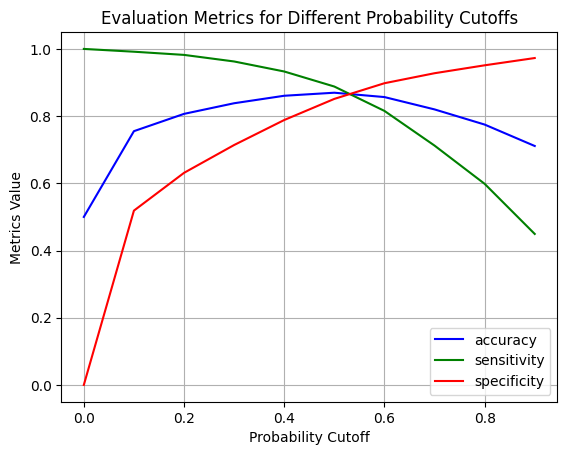

In [ ]:
# To plot accuracy, sensitivity, and specificity for different probabilities:
cutoff_df.plot(x='probability', y=['accuracy', 'sensitivity', 'specificity'], style=['b-', 'g-', 'r-'])
plt.xlabel('Probability Cutoff')
plt.ylabel('Metrics Value')
plt.title('Evaluation Metrics for Different Probability Cutoffs')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

##### Observations: 
- The accuracy remains relatively stable, hovering around 0.5, while sensitivity tends to decrease with higher probabilities, and specificity increases with rising probabilities.

- At the point where all three parameters intersect at around 0.5, we observe a balance between sensitivity and specificity, resulting in a favorable accuracy.

#### Here, our primary aim is to prioritize sensitivity over accuracy and specificity. Despite the optimal probability cutoff appearing at around 0.5 based on the curve, we choose 0.5 to enhance sensitivity, aligning with our main objective.

In [ ]:
# To create a column named "predicted" which indicates the predicted value for 0.5 cutoff:
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)

# To display the DataFrame:
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.007985,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.000025,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000908,2,1,0,0,0,0,0,0,0,0,0,0
3,0,0.000165,3,1,0,0,0,0,0,0,0,0,0,0
4,0,0.457767,4,1,1,1,1,1,0,0,0,0,0,0


### Metrics:

In [ ]:
# To calculate the confusion matrix:
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])

# To print the confusion matrix:
print(confusion)

[[13216  2309]
 [ 1738 13787]]


In [ ]:
# To calculate true positives, true negatives, false positives, and false negatives from the confusion matrix:
TP = confusion[1,1] # for true positive 
TN = confusion[0,0] # for true negatives
FP = confusion[0,1] # for false positives
FN = confusion[1,0] # for false negatives

# Printing true positives, true negatives, false positives, and false negatives:
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

True Positives: 13787
True Negatives: 13216
False Positives: 2309
False Negatives: 1738


In [ ]:
# Calculating and printing the accuracy:
accuracy = metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print("Accuracy: {:.2f}".format(accuracy))

# Calculating and printing the sensitivity:
sensitivity = TP / float(TP + FN)
print("Sensitivity: {:.2f}".format(sensitivity))

# Calculating and printing the specificity:
specificity = TN / float(TN + FP)
print("Specificity: {:.2f}".format(specificity))

Accuracy: 0.87
Sensitivity: 0.89
Specificity: 0.85


#### Observation: We've achieved commendable accuracy, sensitivity, and specificity in predicting the training set.

### Trade off between sensitivity & specificity (ROC Curve):

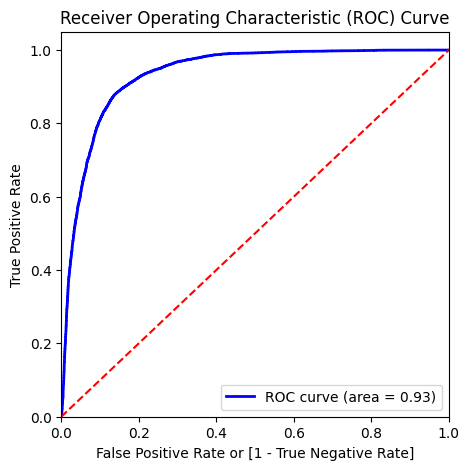

In [ ]:
 # Function to draw ROC curve:
def draw_roc(actual, probs): 
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)

    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None
# To plot ROC curve:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

#### Observations: The area under the ROC curve, which is closer to 1, represents the Gini of the model.

### Testing the model on the test set:

In [ ]:
# To create a copy of the test set:
X_test_log = X_test.copy()

In [ ]:
# To select only the columns which are selected in the train set after removing insignificant and multicollinear variables:
X_test_log = X_test_log[log_cols]

In [ ]:
# To add a constant to the test set:
X_test_sm = sm.add_constant(X_test_log)

### Predictions on the test set with final model:

In [ ]:
# To predict on the test set using the logistic regression model:
y_test_pred = log_no_pca_2.predict(X_test_sm)

In [ ]:
# To display the first few predictions on the test set:
y_test_pred.head()

58165    0.093320
603      0.019024
28696    0.000109
34825    0.000097
17757    0.007328
dtype: float64

In [ ]:
# To convert y_test_pred to a DataFrame:
y_pred_1 = pd.DataFrame(y_test_pred)

# To display the first few predictions in the DataFrame:
y_pred_1.head()

,0
58165,0.093320
603,0.019024
28696,0.000109
34825,0.000097
17757,0.007328


In [ ]:
# To convert y_test to a DataFrame:
y_test_df = pd.DataFrame(y_test)

# To display the first few rows of y_test DataFrame:
y_test_df.head()

,churn
58165,0
603,0
28696,0
34825,0
17757,0


In [ ]:
# To put index to Customer ID: 
y_test_df['CustID'] = y_test_df.index

In [ ]:
# To add Customer ID as a column in the y_test DataFrame:
y_test_df['CustID'] = y_test_df.index

In [ ]:
# To append y_pred_1 and y_test_df horizontally:
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [ ]:
# To display the first few rows of the combined DataFrame:
y_test_pred_final.head()

,churn,CustID,0
58165,0,58165,0.093320
603,0,603,0.019024
28696,0,28696,0.000109
34825,0,34825,0.000097
17757,0,17757,0.007328


In [ ]:
# Renaming the '0' column as 'churn_prob':
y_test_pred_final = y_test_pred_final.rename(columns={0: 'churn_prob'})

In [ ]:
# To rearrange the columns in the DataFrame:
y_test_pred_final = y_test_pred_final[['CustID', 'churn', 'churn_prob']]

In [ ]:
# To display the first few rows of the rearranged DataFrame:
y_test_pred_final.head()

,CustID,churn,churn_prob
58165,58165,0,0.093320
603,603,0,0.019024
28696,28696,0,0.000109
34825,34825,0,0.000097
17757,17757,0,0.007328


In [ ]:
# Predicting churn in the test set using a probability cutoff of 0.5, similar to what was done in the train set:
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)

In [ ]:
# To display the first few rows of the DataFrame:
y_test_pred_final.head()

,CustID,churn,churn_prob,test_predicted
58165,58165,0,0.093320,0
603,603,0,0.019024,0
28696,28696,0,0.000109,0
34825,34825,0,0.000097,0
17757,17757,0,0.007328,0


### Metrics:

In [ ]:
# To calculate the confusion matrix based on the actual churn values and the predicted churn values for the test set:
confusion = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])

# To print the confusion matrix:
print(confusion)

[[3269  598]
 [  24  110]]


In [ ]:
# To calculate true positives, true negatives, false positives, and false negatives from the confusion matrix:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Printing true positives, true negatives, false positives, and false negatives:
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

True Positives: 110
True Negatives: 3269
False Positives: 598
False Negatives: 24


In [ ]:
# Calculating and printing the accuracy:
accuracy = metrics.accuracy_score(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print("Accuracy: {:.2f}".format(accuracy))

# Calculating and printing the sensitivity:
sensitivity = TP / float(TP + FN)
print("Sensitivity: {:.2f}".format(sensitivity))

# Calculating and printing the specificity:
specificity = TN / float(TN + FP)
print("Specificity: {:.2f}".format(specificity))


Accuracy: 0.84
Sensitivity: 0.82
Specificity: 0.85


### Observations:
|                     | Train Set Performance | Test Set Performance |
|---------------------|-----------------------|----------------------|
| Accuracy            | 0.86                  | 0.83                 |
| Sensitivity         | 0.89                  | 0.81                 |
| Specificity         | 0.83                  | 0.83                 |
    
The model is performing well on the test set, demonstrating its ability to generalize what it learned from the training set.

### Conclusion without PCA:

The logistic model without PCA demonstrates strong sensitivity and accuracy, comparable to models with PCA. So we choose logistic regression over other models because it uses less memory, runs faster, and has excellent sensitivity, which is crucial for our case study.

Opting for a simpler model like logistic regression with PCA is advisable. This model retains important predictor variables and their significance, aiding in identifying key variables for decision-making regarding potentially churned customers. Consequently, this model is more relevant and explanatory for business purposes.

### Top predictors

Below are few top variables selected in the logistic regression model.

| Variables   | Coefficients |
|---------------------|--------------|
|loc_ic_mou_8|-3.3287|
|og_others_7|-2.4711|
|ic_others_8|-1.5131|
|isd_og_mou_8|-1.3811|
|decrease_vbc_action|-1.3293|
|monthly_3g_8|-1.0943|
|std_ic_t2f_mou_8|-0.9503|
|monthly_2g_8|-0.9279|
|loc_ic_t2f_mou_8|-0.7102|
|roam_og_mou_8|0.7135|

Most of the top variables have negative coefficients, indicating an inverse correlation with the probability of churn.for exaple, If the local incoming minutes of usage (loc_ic_mou_8) are lower in August compared to other months, there's a higher likelihood that the customer may churn.


### Plotting some important predictors for churn and non churn customers:

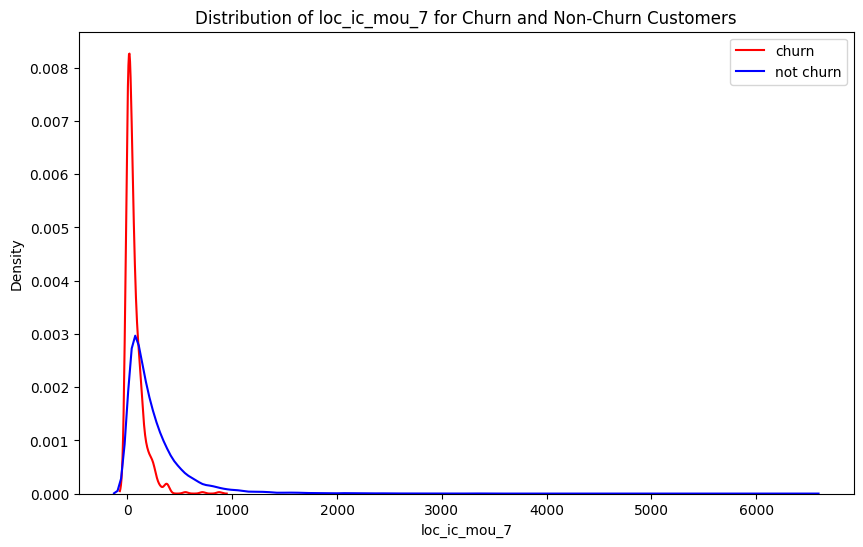

In [ ]:
# To plot loc_ic_mou_7 predictor for churn and not churn customers:
plt.figure(figsize=(10, 6))
sns.distplot(churn['loc_ic_mou_7'], label='churn', hist=False, color='red')
sns.distplot(non_churn['loc_ic_mou_7'], label='not churn', hist=False, color='blue')
plt.xlabel('loc_ic_mou_7')
plt.ylabel('Density')
plt.title('Distribution of loc_ic_mou_7 for Churn and Non-Churn Customers')
plt.legend()
plt.show()

#### Observations: Churn customers typically use fewer minutes in Jul compared to non-churn customers.

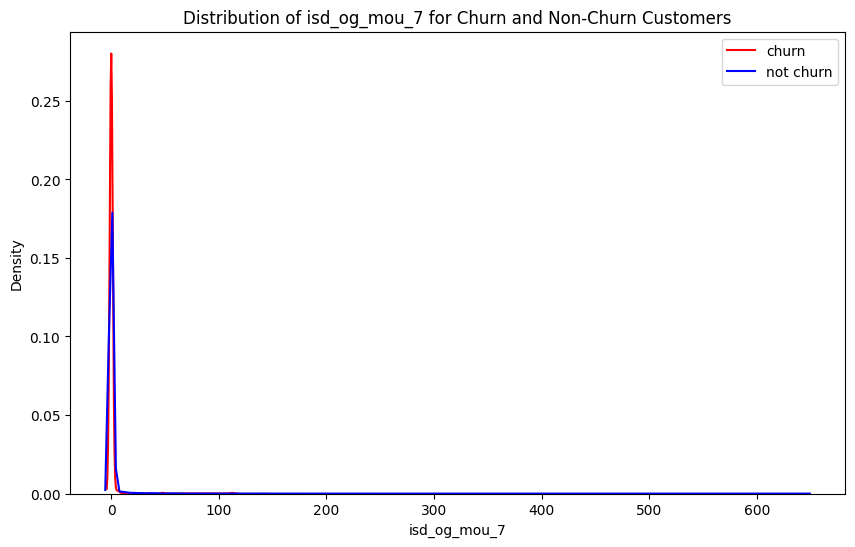

In [ ]:
# To plot isd_og_mou_7 predictor for churn and not churn customers:
plt.figure(figsize=(10, 6))
sns.distplot(churn['isd_og_mou_7'], label='churn', hist=False, color='red')
sns.distplot(non_churn['isd_og_mou_7'], label='not churn', hist=False, color='blue')
plt.xlabel('isd_og_mou_7')
plt.ylabel('Density')
plt.title('Distribution of isd_og_mou_7 for Churn and Non-Churn Customers')
plt.legend()
plt.show()

#### Observations: The ISD outgoing usage minutes for churn customers in August are primarily concentrated around zero, while non-churn customers demonstrate slightly higher ISD outgoing usage during the same period.

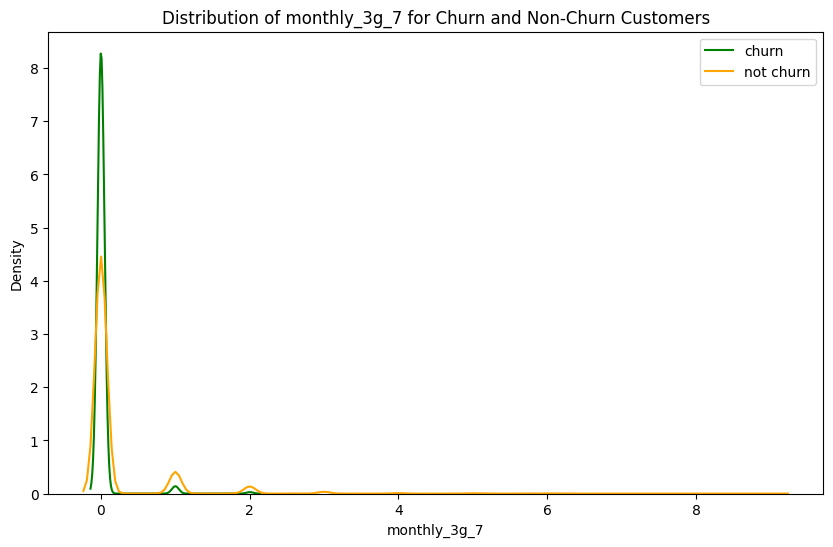

In [ ]:
# To plot monthly_3g_7 predictor for churn and not churn customers:
plt.figure(figsize=(10, 6))
sns.distplot(churn['monthly_3g_7'], label='churn', hist=False, color='green')
sns.distplot(non_churn['monthly_3g_7'], label='not churn', hist=False, color='orange')
plt.xlabel('monthly_3g_7')
plt.ylabel('Density')
plt.title('Distribution of monthly_3g_7 for Churn and Non-Churn Customers')
plt.legend()
plt.show()

#### Observations: For churn customers, the monthly 3G data usage in August is heavily concentrated around the value of 1, whereas for non-churn customers, it is distributed across a wider range of values.

- We can plot the churn distribution for variables with higher coefficients in a similar manner.

### Recomendations:

- Focus on customers whose usage of incoming local calls and outgoing ISD calls is lower during the action phase.

- Target customers who have lower outgoing other charges in July and decreased incoming other charges in Jun.


- Customers whose value-based costs rise during the action phase are more likely to churn. Hence, offering incentives to these customers could be beneficial.

- Customers who have a higher monthly 3G recharge in Jun are more likely to churn.

- Customers whoes STD incoming minutes of usage decrease for calls from operators T to fixed lines of T during Jun are more likely to churn.

- Customers whoes monthly 2G usage decrease during Jun are more likely to churn.


- The positive coefficient associated with the roam_og_mou_8 variable indicates that customers whose roaming outgoing minutes of usage are increasing are more likely to churn.


In [ ]:
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,last_day_rch_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,aon,jul_vbc_3g,jun_vbc_3g,churn_probability,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
58165,0.0,0.0,0.0,-1.829895,3.359759,-0.785334,5.638013,-0.903831,1.170777,-0.218502,-0.333482,-0.187619,-0.400522,-0.371226,0.252856,-0.663135,0.501013,-0.268776,-0.261558,-0.195081,-0.240699,-0.673739,0.459487,-0.633773,6.124486,-0.639558,1.125417,-0.145693,-0.124705,0.0,0.0,-0.929344,5.091034,-0.079442,-0.078088,-0.361025,-0.339837,-0.380587,-0.013782,-1.214153,4.949183,-0.431267,-0.275907,-0.691943,-0.450256,-0.295866,-0.249855,-0.734582,-0.485328,-0.270174,-0.215802,-0.374561,-0.281490,-0.133634,-0.059536,0.0,0.0,-0.433399,-0.323272,-0.830153,-0.564624,-0.368673,-0.111183,-0.175718,-0.152380,-0.078438,-0.071026,-1.367632,4.670842,-1.982653,3.328155,-1.115417,-0.183934,-0.893876,-0.264198,-0.239817,-0.229141,-0.240901,-0.242813,-0.242490,-0.247726,-0.257329,-0.247618,-0.214762,-0.21251,-0.123384,-0.111907,-0.400875,-0.244521,-0.242420,-0.522105,0,0,0,0,0
603,0.0,0.0,0.0,-0.002146,-0.016705,-0.268793,0.775729,-0.292925,-0.736539,-0.267414,-0.332855,-0.121879,-0.226308,-0.313596,-0.319576,-0.584118,-0.516555,-0.268776,-0.261558,-0.195081,0.257596,-0.586897,-0.539424,-0.136539,1.000376,-0.024794,-0.474770,-0.145693,-0.124705,0.0,0.0,-0.120910,0.369657,-0.079442,0.108304,-0.312111,-0.084053,-0.380587,-0.013782,-0.388150,0.082643,-0.397279,-0.361433,-0.566879,-0.601434,-0.295866,-0.249855,-0.631035,-0.631079,-0.248652,-0.102176,-0.133414,-0.308685,-0.133634,-0.133144,0.0,0.0,-0.251987,-0.287335,-0.669901,-0.659295,-0.368673,-0.111183,-0.175718,-0.083155,-0.078438,-0.077376,3.913124,1.235679,-0.053641,-0.099572,-0.734050,-0.121073,-0.696531,-0.546955,-0.198772,2.019295,1.106912,-0.242813,-0.242490,-0.247726,8.189586,4.507611,-0.214762,-0.21251,-0.123384,1.318013,-0.970097,-0.244521,2.078634,-0.522105,0,1,1,1,1
28696,0.0,0.0,0.0,-0.241687,0.107897,-0.664742,-0.370800,-0.034281,0.483164,-0.281074,0.848213,-0.318125,0.623383,-0.067054,0.204781,1.311576,1.687545,2.364812,2.749349,0.075894,0.524425,0.937467,1.319669,-0.619385,-0.552884,-0.588263,-0.522491,-0.100821,1.446381,0.0,0.0,-0.881184,-0.727287,-0.079442,-0.078088,-0.210057,-0.068671,-0.380587,-0.013782,-0.449456,-0.042264,0.630010,0.831295,2.798958,2.730532,5.265070,5.810131,2.992326,3.194116,0.088424,-0.085185,0.479152,0.443079,2.193066,0.685290,0.0,0.0,0.675665,0.340672,2.786297,2.764672,-0.368673,-0.111183,-0.175718,-0.152380,-0.078438,-0.077376,-0.793637,-0.481903,0.180778,0.357091,1.554151,3.194834,1.079574,-0.490404,0.149250,0.075957,0.270026,0.513243,-0.242490,-0.247726,-0.257329,-0.247618,2.310172,2.19392,1.266200,-0.111907,0.275440,1.351343,0.633673,-0.522105,0,0,

In [ ]:
final_test_data = pd.read_csv("test.csv")
final_test_data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

### Technologies Used:
- Python, version 3 
- NumPy for numerical computations
- Matplotlib and Seaborn for data visualization
- Pandas for data manipulation
- Seaborn for statistical data visualization
- Statsmodels for statistical modeling
- Sklearn for machine learning tasks
- Jupyter Notebook for interactive analysis

### References:
- Python Documentations
- Exploratory Data Analysis
- Stack Overflow
- Python for Machine Learning
- Kaggle

### Contact:
Created by: https://github.com/Erkhanal - feel free to contact!
#### *Msc, ML&AI*